# Laboratorio 1 Data Science - Series de Tiempo

##### Diego Garcia # 22404
##### Cesar Lopez # 22535


Repositorio de github: 
```
https://github.com/Czar272/Lab1_DS.git

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet



C:\Users\dgv31\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Convertir de xlsx a csv

In [30]:
# FileOG = "./data/Excel/Estadisticas_historicas_comercializacion.xlsx"
# importacion = pd.read_excel(FileOG, sheet_name="IMPORTACION", engine="openpyxl")
# costoImport = pd.read_excel(FileOG, sheet_name="COSTO IMPORTACION", engine="openpyxl")
# consumo = pd.read_excel(FileOG, sheet_name="CONSUMO", engine="openpyxl")
# exportacion = pd.read_excel(FileOG, sheet_name="EXPORTACION", engine="openpyxl")

# importacionCSV = "./data/CSV/importacion.csv"
# costoImportCSV = "./data/CSV/costoImport.csv"
# consumoCSV = "./data/CSV/consumo.csv"
# exportacionCSV = "./data/CSV/exportacion.csv"

# importacion.to_csv(importacionCSV, index=False)
# costoImport.to_csv(costoImportCSV, index=False)
# consumo.to_csv(consumoCSV, index=False)
# exportacion.to_csv(exportacionCSV, index=False)

In [ ]:
# consumo_df = pd.read_csv("./data/CSV/consumo.csv")
# importacion_df = pd.read_csv("./data/CSV/importacion.csv")

# columnas_deseadas = ["Fecha", "Gasolina regular", "Gasolina superior", "Diesel alto azufre"]

# consumo_filtrado = consumo_df[columnas_deseadas]
# importacion_filtrado = importacion_df[columnas_deseadas]

# consumo_filtrado.to_csv("./data/CSV/consumo.csv", index=False)
# importacion_filtrado.to_csv("./data/CSV/importacion.csv", index=False)

# print("Archivos 'consumo.csv' e 'importacion.csv' actualizados correctamente.")


Archivos 'consumo.csv' e 'importacion.csv' actualizados correctamente.


### Descripción de los datos

__IMPORTACION__

En este conjunto se registra el volumen de productos petroleros importados de forma mensual a Guatemala desde el 2001 hasta el 2024. La unidad de medición de cada una de las variables en este conjunto es de barriles*. Para este análisis solo se tomaran en cuenta las columans de gasolina regular, gasolina super y diese de alto azufre.

*Un barril equivale a 42 galones.

In [32]:
importacion = pd.read_csv("./data/CSV/importacion.csv")

print("\nResumen Importación:")
print(importacion.describe())


Resumen Importación:
       Gasolina regular  Gasolina superior  Diesel alto azufre
count      2.880000e+02       2.880000e+02        2.880000e+02
mean       4.129493e+05       4.909544e+05        5.541217e+05
std        2.432627e+05       1.565581e+05        4.097571e+05
min        8.101530e+04       1.702925e+05        0.000000e+00
25%        2.082069e+05       3.693299e+05        0.000000e+00
50%        3.275593e+05       4.813002e+05        6.380928e+05
75%        5.761171e+05       6.083053e+05        8.447706e+05
max        1.141366e+06       1.227174e+06        1.595699e+06


<Figure size 1000x500 with 0 Axes>

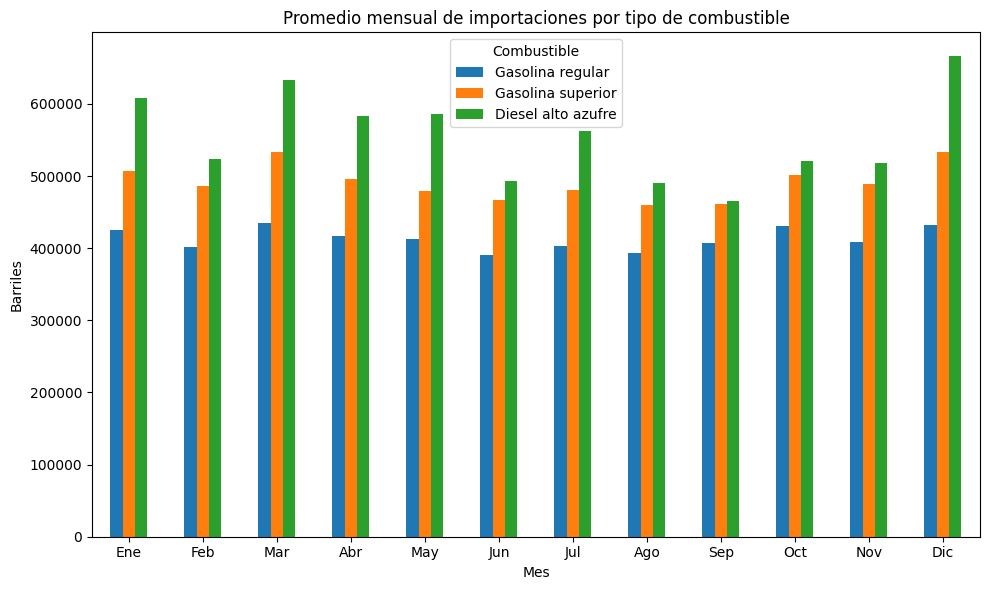

In [33]:
# Meses con más importaciones
importacion['Fecha'] = pd.to_datetime(importacion['Fecha'])
importacion['Mes'] = importacion['Fecha'].dt.month
prom_mensual_imp = importacion.groupby('Mes')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].mean()

plt.figure(figsize=(10,5))
prom_mensual_imp.plot(kind='bar', figsize=(10,6))
plt.title('Promedio mensual de importaciones por tipo de combustible')
plt.xlabel('Mes')
plt.ylabel('Barriles')
plt.xticks(ticks=range(0,12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
plt.legend(title="Combustible")
plt.tight_layout()
plt.show()

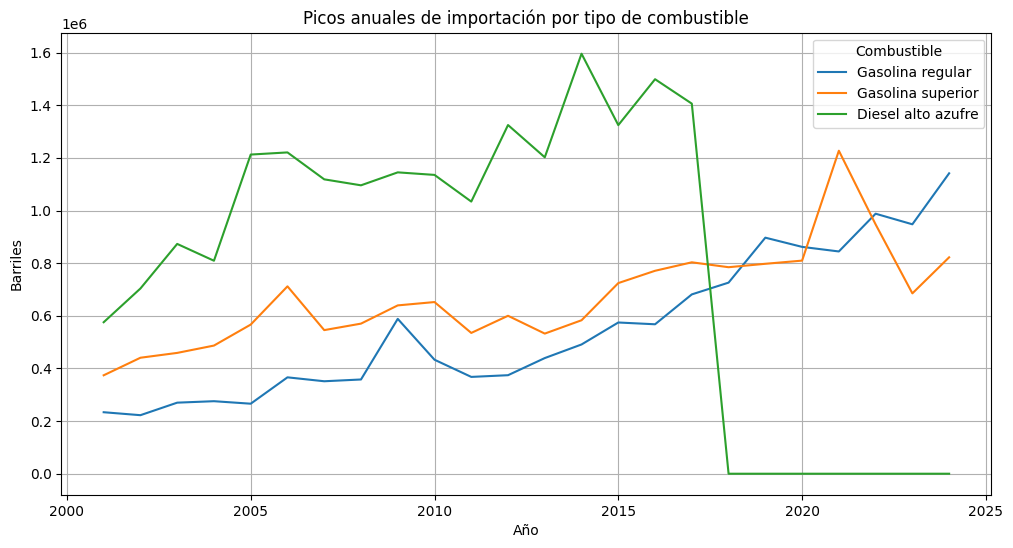

In [34]:
#Picos anuales por tipo de combustible
importacion['Año'] = importacion['Fecha'].dt.year
picos_imp = importacion.groupby('Año')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].max()

picos_imp.plot(figsize=(12,6))
plt.title('Picos anuales de importación por tipo de combustible')
plt.ylabel('Barriles')
plt.xlabel('Año')
plt.grid(True)
plt.legend(title="Combustible")
plt.show()

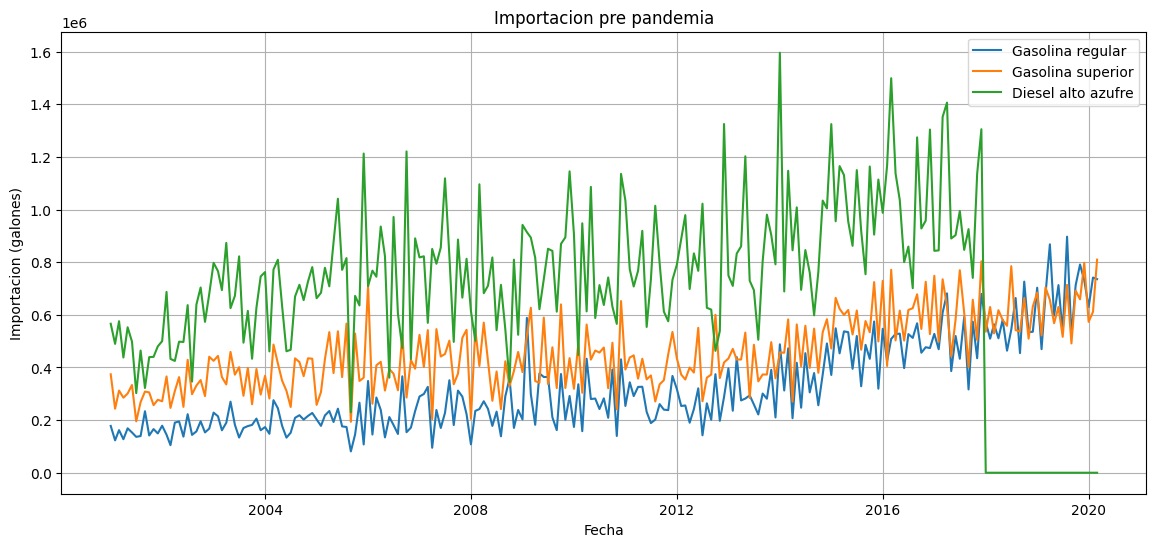

In [35]:
# Comportamiento pre pandemia
postYears = importacion[importacion['Fecha'] <= '2020-03-1']

plt.figure(figsize=(14, 6))
for tipo in ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']:
    plt.plot(postYears['Fecha'], postYears[tipo], label=tipo)
plt.title('Importacion pre pandemia')
plt.xlabel('Fecha')
plt.ylabel('Importacion (galones)')
plt.legend()
plt.grid(True)
plt.show()

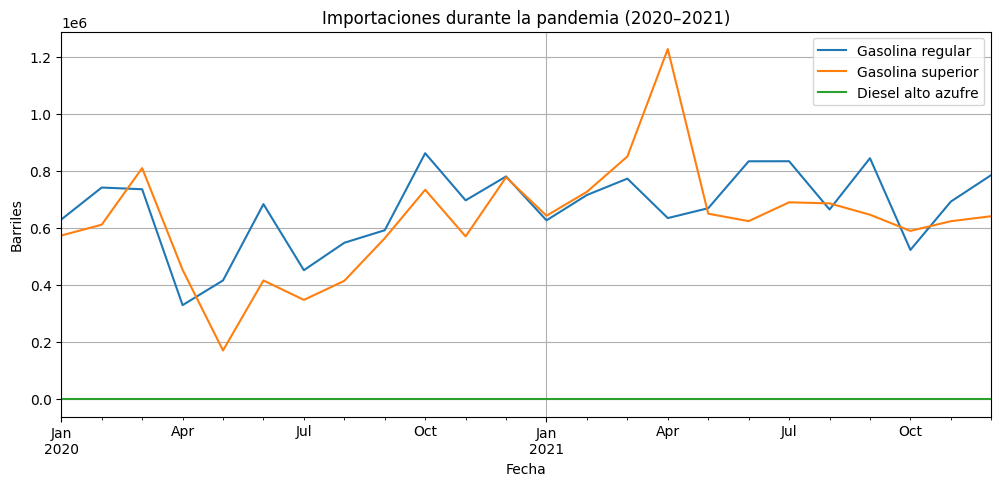

In [36]:
# Comportamiento en pandemia
mask_pandemia = (importacion['Fecha'] >= '2020-01-01') & (importacion['Fecha'] <= '2021-12-31')
imp_pandemia = importacion[mask_pandemia]

imp_pandemia.set_index('Fecha')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].plot(figsize=(12,5))
plt.title("Importaciones durante la pandemia (2020–2021)")
plt.ylabel("Barriles")
plt.grid(True)
plt.show()


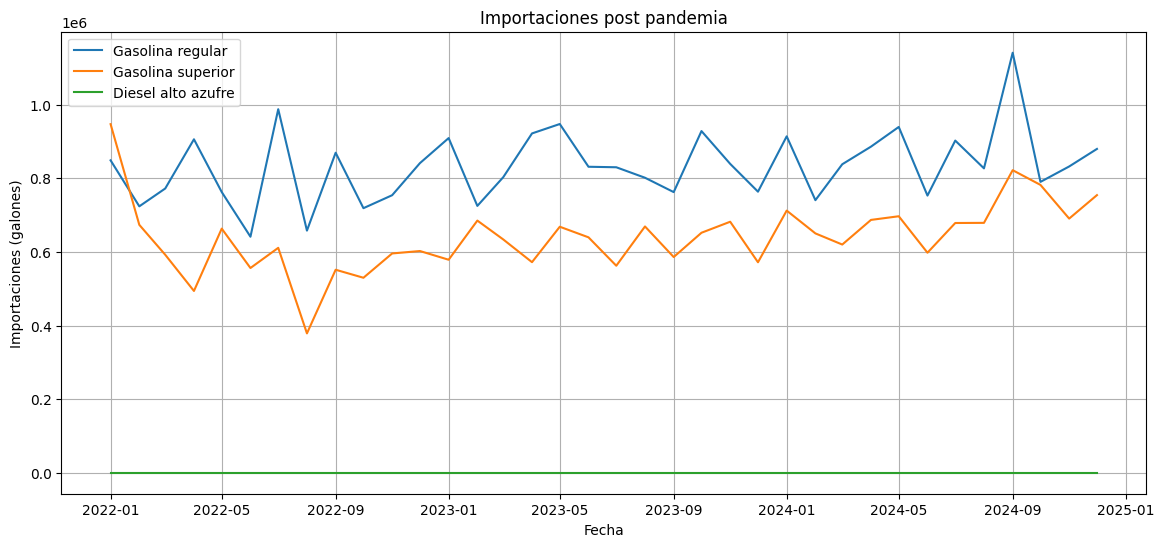

In [37]:
# Comportamiento post pandemia
postYears = importacion[importacion['Fecha'] >= '2022-01-1']

plt.figure(figsize=(14, 6))
for tipo in ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']:
    plt.plot(postYears['Fecha'], postYears[tipo], label=tipo)
plt.title('Importaciones post pandemia')
plt.xlabel('Fecha')
plt.ylabel('Importaciones (galones)')
plt.legend()
plt.grid(True)
plt.show()


__CONSUMO__

Este conjunto representa el consumo mensual interno de diferentes productos petroleros en Guatemala. La unidad en la que se mide cada variable es en barriles*. Los registros en este conjunto van del 2000 al 2024.Para este análisis solo se tomaran en cuenta las columans de gasolina regular, gasolina super y diese de alto azufre.

*Un barril equivale a 42 galones.

In [38]:
consumo = pd.read_csv("./data/CSV/consumo.csv")

print("Resumen Consumo:")
print(consumo.describe())

Resumen Consumo:
       Gasolina regular  Gasolina superior  Diesel alto azufre
count        300.000000         300.000000        3.000000e+02
mean      397478.894458      470248.678849        5.144313e+05
std       219102.049432      113504.653305        3.688977e+05
min       160741.900000      300242.781667        0.000000e+00
25%       215650.312917      383931.904375        0.000000e+00
50%       288193.130000      423319.540000        6.721700e+05
75%       548073.682500      573704.195000        7.791021e+05
max       938086.570000      786598.120000        1.149175e+06


<Figure size 1000x500 with 0 Axes>

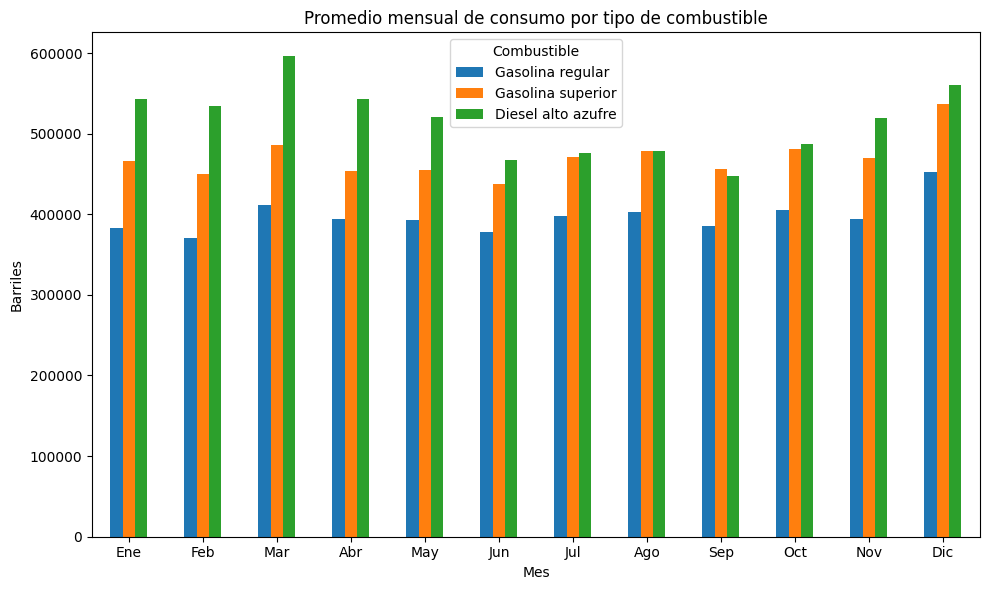

In [39]:
#meses con más consumo
consumo['Fecha'] = pd.to_datetime(consumo['Fecha'])
consumo['Mes'] = consumo['Fecha'].dt.month
prom_mensual_con = consumo.groupby('Mes')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].mean()

plt.figure(figsize=(10,5))
prom_mensual_con.plot(kind='bar', figsize=(10,6))
plt.title('Promedio mensual de consumo por tipo de combustible')
plt.xlabel('Mes')
plt.ylabel('Barriles')
plt.xticks(ticks=range(0,12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
plt.legend(title="Combustible")
plt.tight_layout()
plt.show()

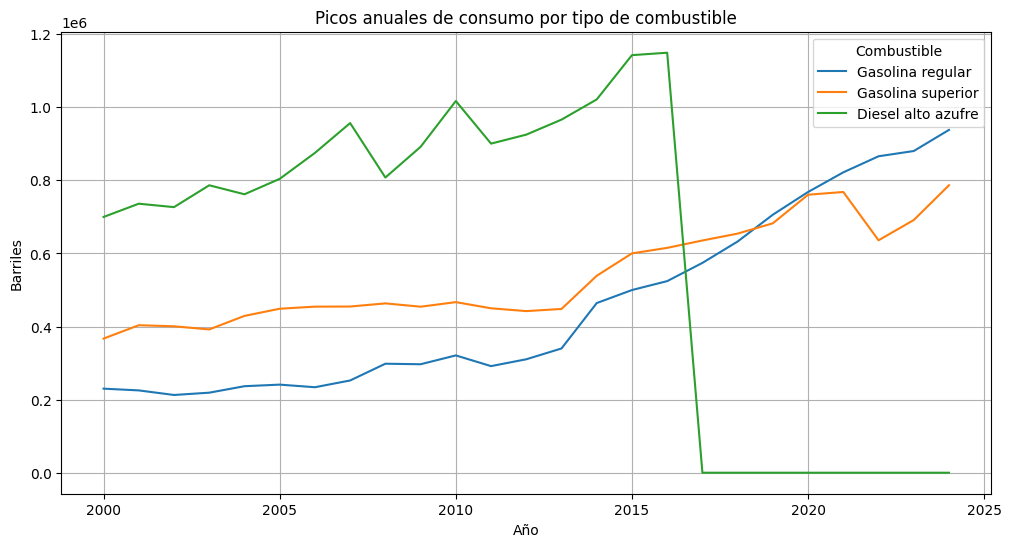

In [40]:
#picos anuales por tipo de combustible
consumo['Año'] = consumo['Fecha'].dt.year
picos_con = consumo.groupby('Año')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].max()

picos_con.plot(figsize=(12,6))
plt.title('Picos anuales de consumo por tipo de combustible')
plt.ylabel('Barriles')
plt.xlabel('Año')
plt.grid(True)
plt.legend(title="Combustible")
plt.show()

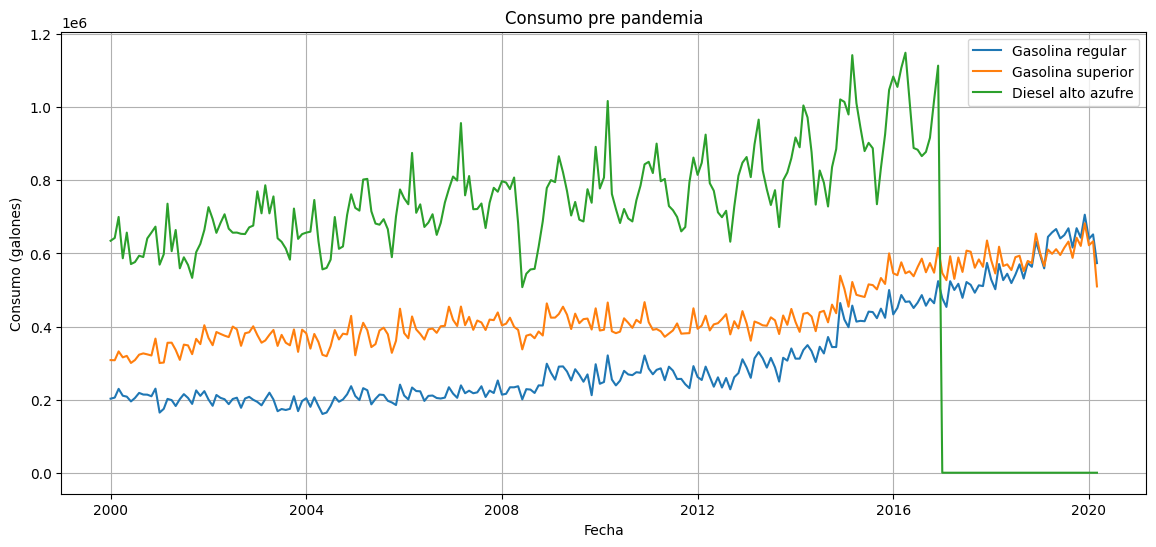

In [41]:
# Comportamiento pre pandemia
postYears = consumo[consumo['Fecha'] <= '2020-03-1']

plt.figure(figsize=(14, 6))
for tipo in ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']:
    plt.plot(postYears['Fecha'], postYears[tipo], label=tipo)
plt.title('Consumo pre pandemia')
plt.xlabel('Fecha')
plt.ylabel('Consumo (galones)')
plt.legend()
plt.grid(True)
plt.show()

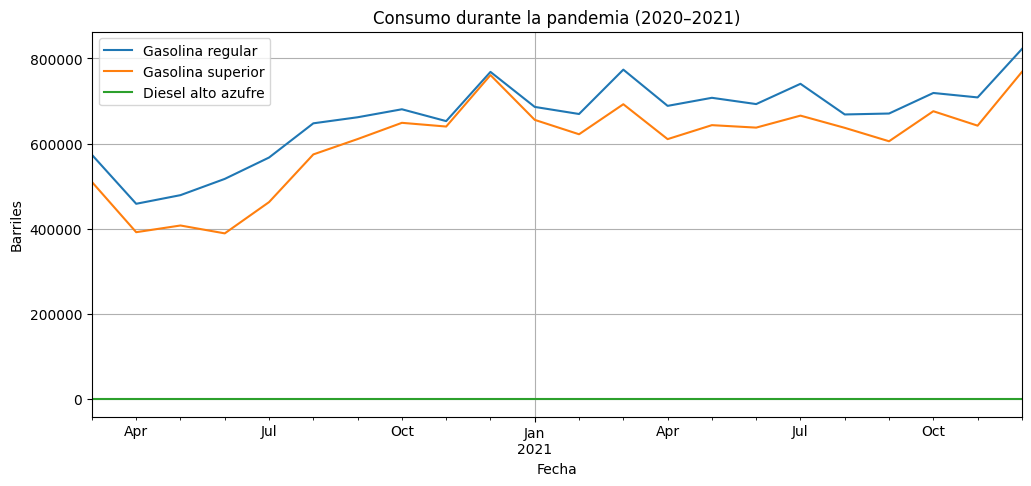

In [42]:
# Comportamiento en pandemia
mask_pandemia_con = (consumo['Fecha'] >= '2020-03-01') & (consumo['Fecha'] <= '2021-12-31')
con_pandemia = consumo[mask_pandemia_con]

con_pandemia.set_index('Fecha')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].plot(figsize=(12,5))
plt.title("Consumo durante la pandemia (2020–2021)")
plt.ylabel("Barriles")
plt.grid(True)
plt.show()

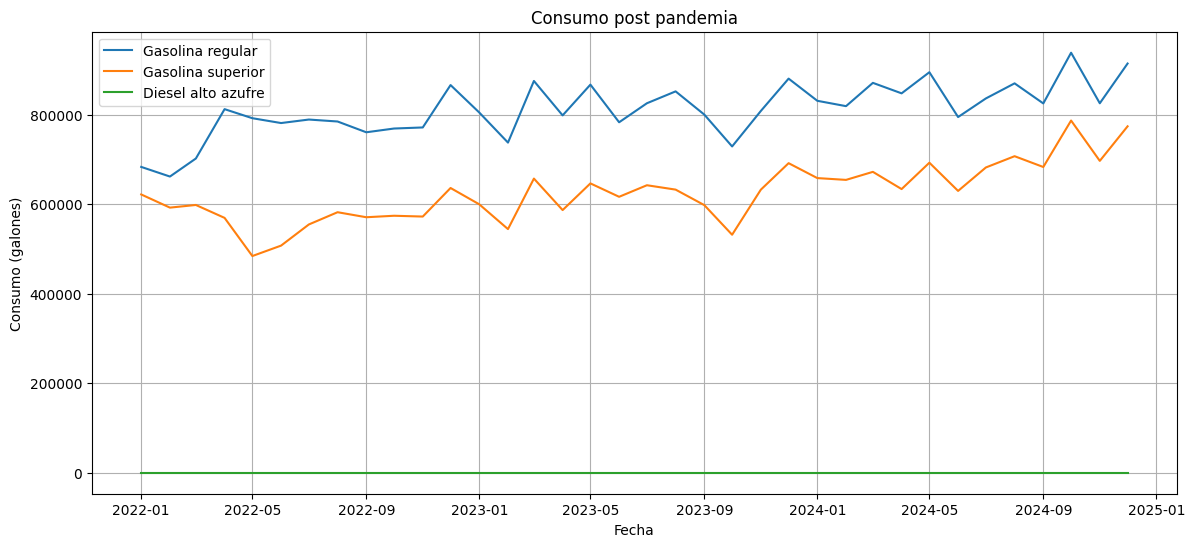

In [43]:
# Comportamiento post pandemia
postYears = consumo[consumo['Fecha'] >= '2022-01-1']

plt.figure(figsize=(14, 6))
for tipo in ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']:
    plt.plot(postYears['Fecha'], postYears[tipo], label=tipo)
plt.title('Consumo post pandemia')
plt.xlabel('Fecha')
plt.ylabel('Consumo (galones)')
plt.legend()
plt.grid(True)
plt.show()

### Series Univariantes

##### __Importacion (Gasolina superior, Gasolina regular, Diesel)__

In [44]:
file_path = "./data/CSV/importacion.csv"
df = pd.read_csv(file_path)

In [45]:
df = df[pd.to_datetime(df['Fecha'], errors='coerce').notna()]
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Preprocessing para diesel alto azufre
serie_diesel = df[['Fecha', 'Diesel alto azufre']].copy()
serie_diesel.rename(columns={'Diesel alto azufre': 'Diesel'}, inplace=True)

serie_gasolina_regular = df[['Fecha', 'Gasolina regular']].set_index('Fecha')
serie_gasolina_regular = serie_gasolina_regular.asfreq('MS')  # Frecuencia mensual

serie_gasolina_superior = df[['Fecha', 'Gasolina superior']].set_index('Fecha')
serie_gasolina_superior = serie_gasolina_superior.asfreq('MS')  # Frecuencia mensual

serie_diesel.set_index('Fecha', inplace=True)
serie_diesel = serie_diesel.asfreq('MS')


In [46]:
print("Gasolina Regular: \n")
print("Inicio:", serie_gasolina_regular.index.min())
print("Fin:", serie_gasolina_regular.index.max())
print("Frecuencia:", pd.infer_freq(serie_gasolina_regular.index))

print("\nGasolina Superior: \n")
print("Inicio:", serie_gasolina_superior.index.min())
print("Fin:", serie_gasolina_superior.index.max())
print("Frecuencia:", pd.infer_freq(serie_gasolina_superior.index))

print("\nDiesel: \n")
print("Inicio:", serie_diesel.index.min())
print("Fin:", serie_diesel.index.max())
print("Frecuencia:", pd.infer_freq(serie_diesel.index))

Gasolina Regular: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS

Gasolina Superior: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS

Diesel: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS


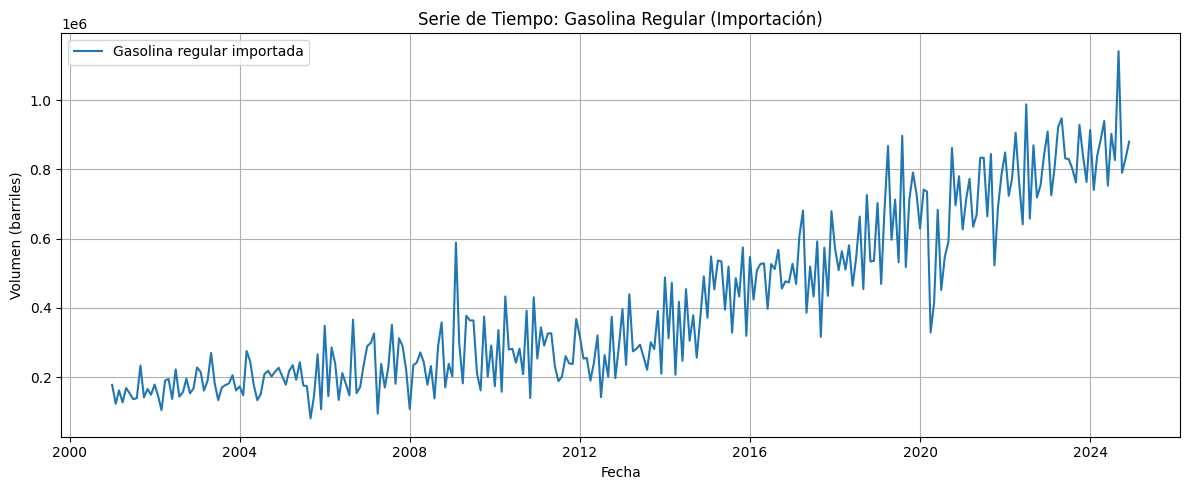

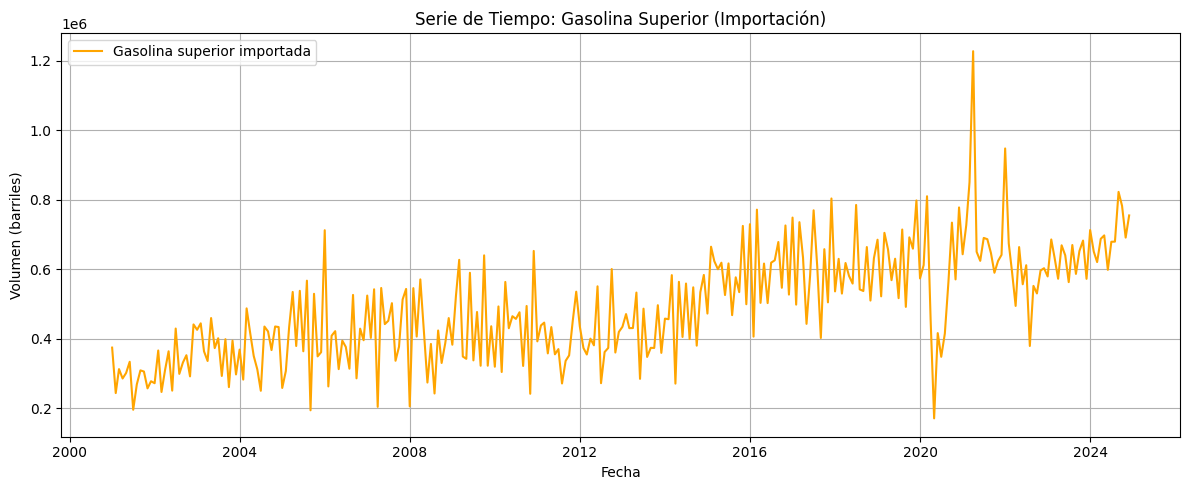

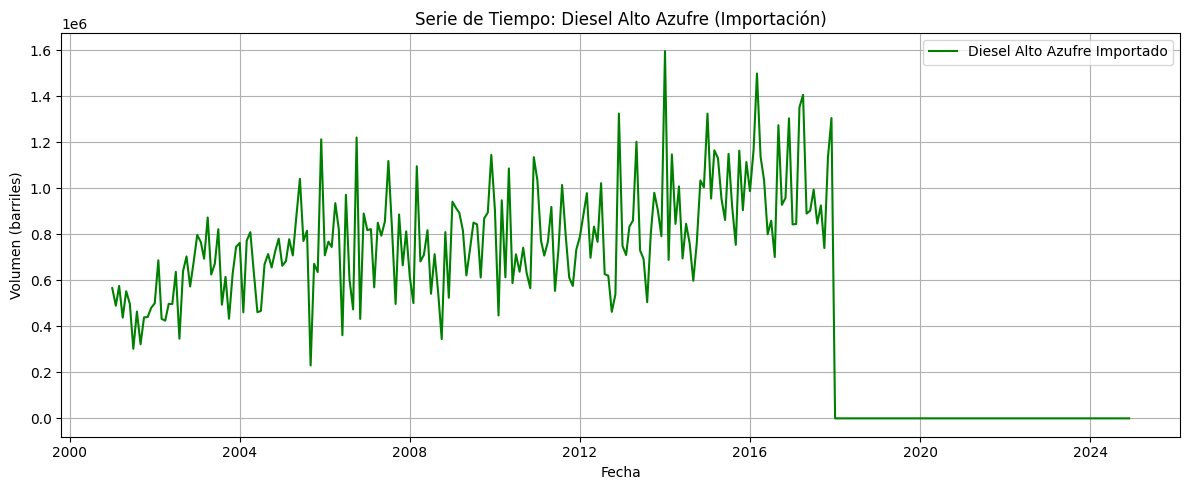

In [47]:
# === Gráfico de la serie Gasolina regular Importada===
plt.figure(figsize=(12, 5))
plt.plot(serie_gasolina_regular, label='Gasolina regular importada')
plt.title('Serie de Tiempo: Gasolina Regular (Importación)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# === Gráfico de la serie Gasolina superior Importada===
plt.figure(figsize=(12, 5))
plt.plot(serie_gasolina_superior, label='Gasolina superior importada', color='orange')
plt.title('Serie de Tiempo: Gasolina Superior (Importación)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# === Gráfico de la serie Diesel ===
plt.figure(figsize=(12, 5))
plt.plot(serie_diesel, label='Diesel Alto Azufre Importado', color='green')
plt.title('Serie de Tiempo: Diesel Alto Azufre (Importación)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


-  __Analisis Graficas__

A primera vista se puede ver lo siguiente: 

Para la gasolina regular podemos ver que ha ido en un crecimiento normal, teniendo un pico aproximadamente en el 2009 en importaciones, un bajon a mediados de 2020, en general un crecimiento normal, notando que desde 2012 empezo a tener una pendiente un poco mas inclinada.

Para la gasolina superior, a comparacion de la gasolina regular, esta grafica se ve mas irregular, entre el año 2020 y 2022, se nota mucha variacion llegando a valores muy bajos y muy altos en poco tiempo. Fuera de esos años, un crecimiento bastante lento en comparacion con la gasolina regular.

Para el Diesel de alto azufre, lo que mas sobresale es que en el 2018, todo llego a 0, lo cual es poco probable, entonces nos lleva a pensar que es un error de recopilacion de data. Ademas de eso, podemos notar que a comparacion de los otros tipos de gasolina, que este empieza con un nivel de volumen mas alto. Es bastante mas irregular que las otras, aunque siempre va en crecimiento.

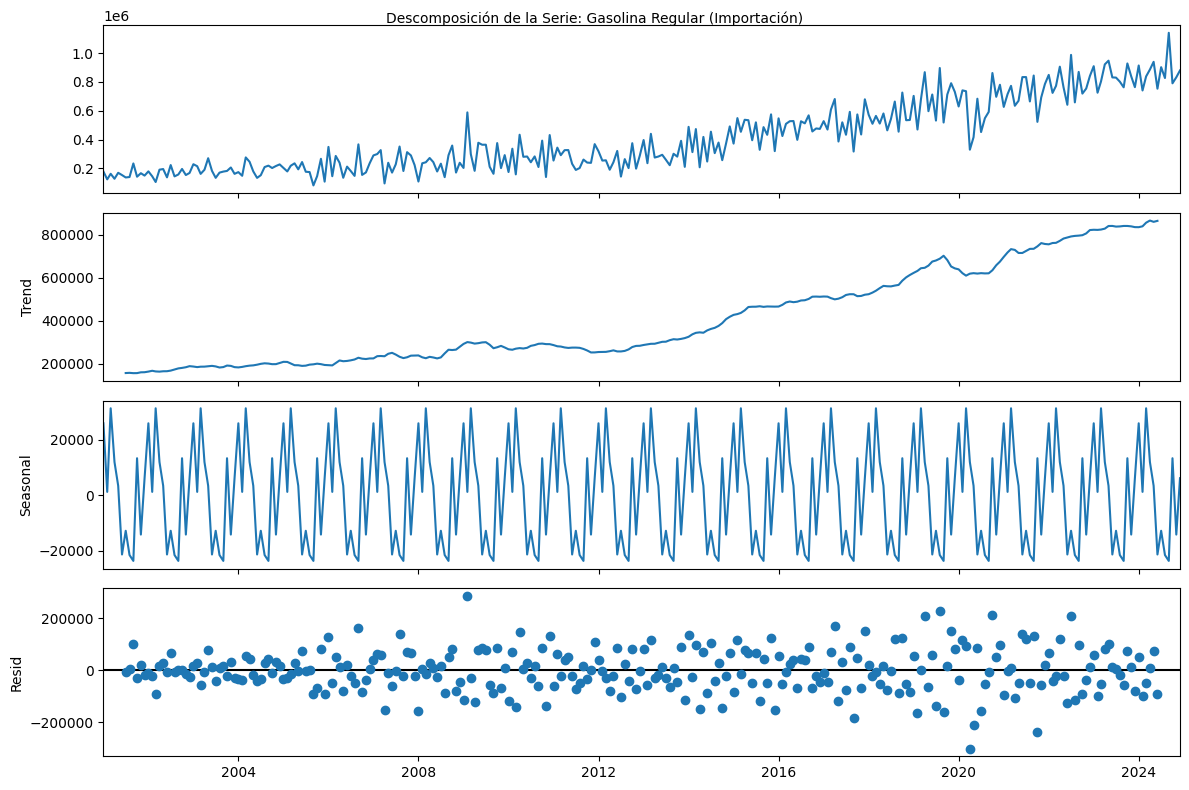

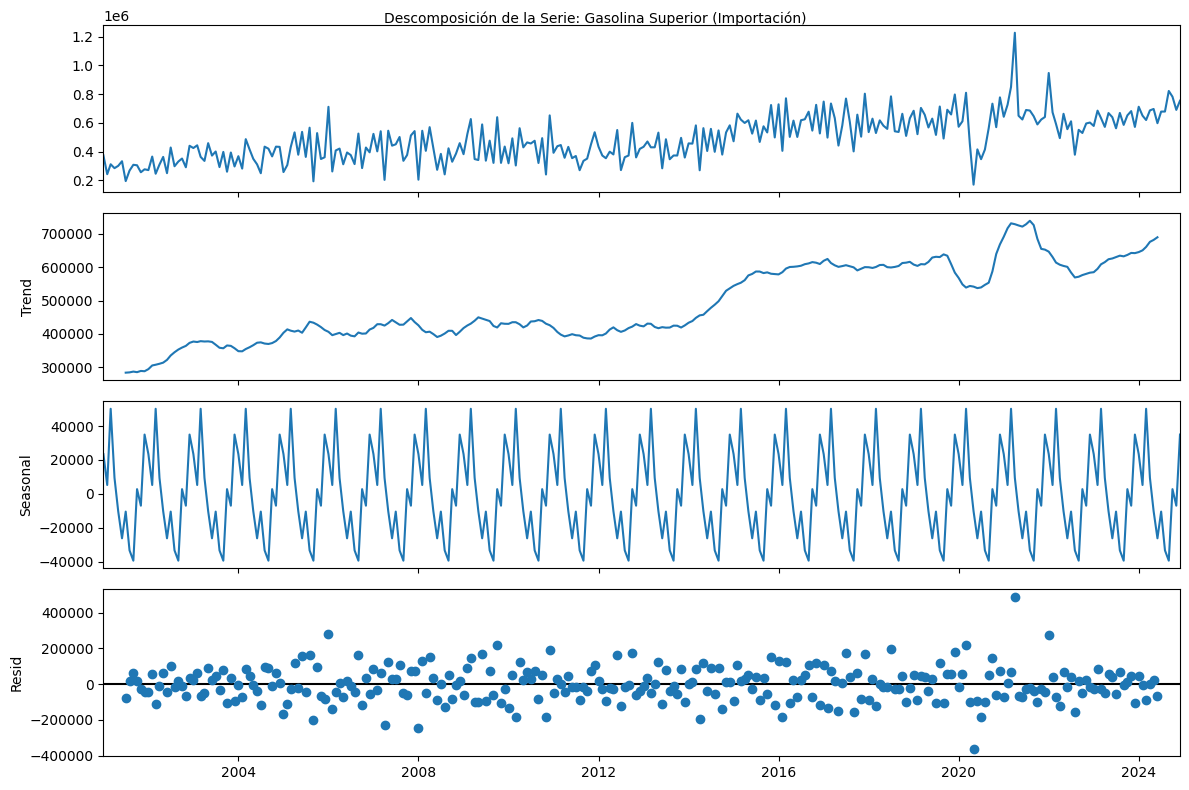

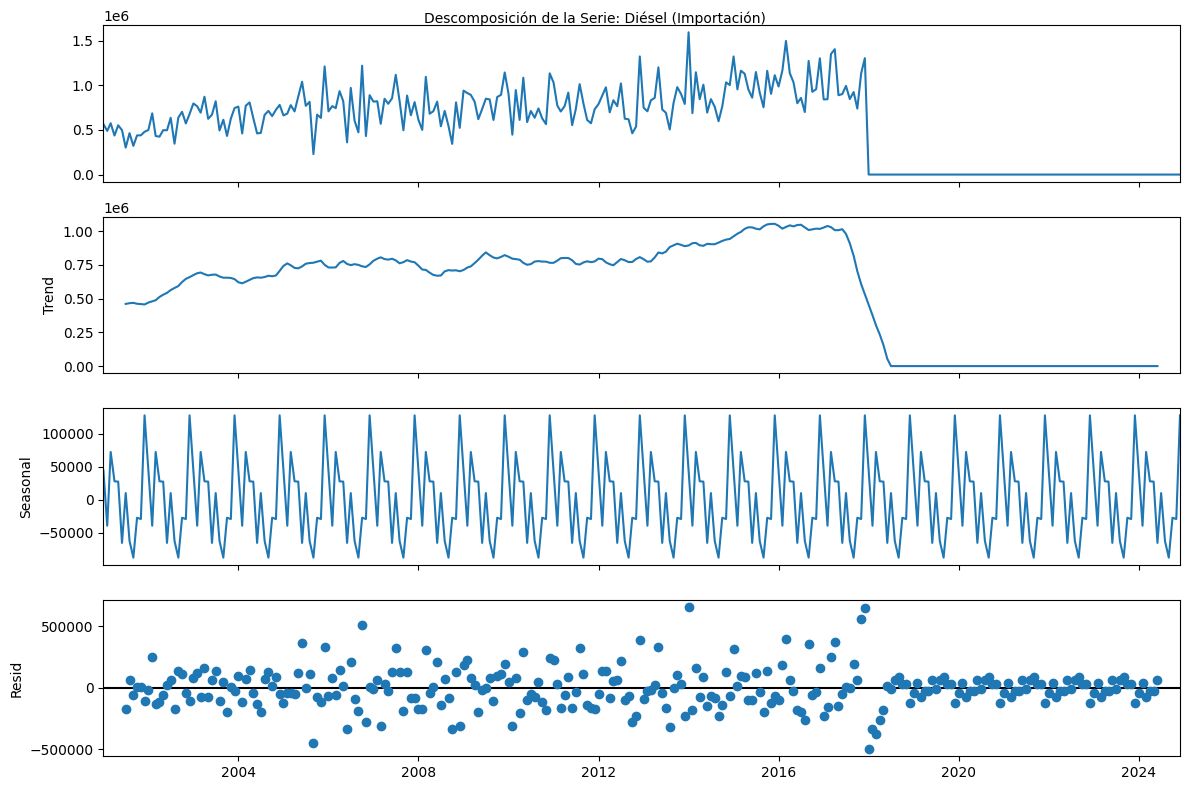

In [48]:
regular_decompose = seasonal_decompose(serie_gasolina_regular, model='additive')
super_decompose = seasonal_decompose(serie_gasolina_superior, model='additive')
diesel_decompose = seasonal_decompose(serie_diesel, model='additive')

# Gráfica de los componentes Regular Importacion
plt.rcParams.update({'figure.figsize': (12, 8)})
regular_decompose.plot()
plt.suptitle("Descomposición de la Serie: Gasolina Regular (Importación)", fontsize=10)
plt.show()


# Gráfica de los componentes Super Importación
plt.rcParams.update({'figure.figsize': (12, 8)})
super_decompose.plot()
plt.suptitle("Descomposición de la Serie: Gasolina Superior (Importación)", fontsize=10)
plt.show()

# Gráfica de los componentes Diésel Importación
plt.rcParams.update({'figure.figsize': (12, 8)})
diesel_decompose.plot()
plt.suptitle("Descomposición de la Serie: Diésel (Importación)", fontsize=10)
plt.show()


-  __Analisis de los componentes gasolina superior importacion__


    - __Trend:__
La componente de tendencia muestra un crecimiento sostenido en las importaciones de gasolina regular desde el año 2001 hasta alrededor de 2023. Este crecimiento no es lineal, pero sí constante en el largo plazo, con algunos períodos de desaceleración o estabilización, especialmente entre 2014 y 2016, y una caída moderada alrededor del 2020, posiblemente relacionada con la pandemia de COVID-19. El hecho de que la media de la serie se incremente a lo largo del tiempo indica que la serie no es estacionaria en media, ya que la tendencia altera la estabilidad del nivel general de la serie temporal.


    - __Seasonal:__ 
La componente estacional refleja un patrón claro y repetitivo a lo largo de cada año. Específicamente, se observan aumentos y disminuciones regulares con la misma estructura mes a mes, lo que indica una estacionalidad mensual fuerte. Este comportamiento sugiere que las importaciones de gasolina regular siguen un patrón cíclico anual, probablemente vinculado al consumo estacional, vacaciones, actividades económicas o políticas de abastecimiento. La estacionalidad se mantiene bastante constante en amplitud, lo cual es útil para modelar y prever el comportamiento futuro.


    - __Resid:__ 
Los residuos, es decir, la parte no explicada por la tendencia ni la estacionalidad, parecen oscilar alrededor de cero y no muestran una tendencia visible ni cambios significativos en su dispersión a lo largo del tiempo. Esto sugiere que los residuos son ruido aleatorio con varianza aproximadamente constante, lo cual es un buen indicio para modelar. Aunque se observan algunos puntos atípicos (especialmente entre 2020 y 2021), no hay una evidencia clara de que la varianza cambie sistemáticamente, por lo que se puede decir que la serie es aproximadamente estacionaria en varianza.

-  __Análisis de los componentes Gasolina Superior (Importación)__


    - __Trend:__
La componente de tendencia muestra un crecimiento sostenido en las importaciones de gasolina superior desde 2001 hasta 2023. Este crecimiento no es estrictamente lineal, pero sí continuo, con ciertos periodos de desaceleración (como entre 2014 y 2016) y una caída transitoria alrededor del 2020, coherente con la disrupción económica causada por la pandemia. La presencia de esta tendencia ascendente implica que la serie no es estacionaria en media, pues el nivel promedio varía con el tiempo.


    - __Seasonal:__ 
La estacionalidad en esta serie es clara y bien estructurada, con oscilaciones regulares a lo largo de los años. Se presenta una estacionalidad mensual consistente, en la que se repiten patrones similares cada año, probablemente relacionados con el comportamiento estacional de la demanda. La estabilidad en la amplitud del componente estacional sugiere que este patrón se mantiene constante a lo largo del tiempo.


    - __Resid:__ 
Los residuos de la serie oscilan en torno a cero, con dispersión relativamente constante a lo largo del tiempo. No se observan patrones sistemáticos ni tendencias marcadas, lo que sugiere que los errores son esencialmente aleatorios. Existen algunos puntos atípicos, especialmente cerca del 2020, pero en general no comprometen la estacionaridad en varianza. Esto indica que los principales componentes de la serie han sido adecuadamente capturados por la descomposición.


-  __Análisis de los componentes Gasolina Superior (Importación)__

    - __Trend:__
La componente de tendencia en la serie de importación de diésel muestra una trayectoria más variable que en las gasolinas. Si bien existe un crecimiento general desde 2001, se aprecian más fluctuaciones a lo largo del tiempo, con caídas visibles entre 2008–2009 y una reducción importante en 2020. Estas oscilaciones pueden reflejar una mayor sensibilidad del mercado de diésel a factores externos. La variación del nivel medio a lo largo del tiempo indica que la serie no es estacionaria en media.


    - __Seasonal:__ 
El componente estacional es igualmente fuerte y definido. Las oscilaciones estacionales se presentan con una forma y amplitud relativamente constantes año con año, lo que indica una estacionalidad mensual robusta. Esto puede deberse a la estacionalidad de la actividad industrial o del transporte, que influye directamente en el consumo de diésel. Esta regularidad hace viable incorporar esta estacionalidad en modelos futuros.


    - __Resid:__ 
Los residuos parecen estar centrados en cero y muestran una varianza relativamente estable, aunque con algunos picos aislados —nuevamente, notables entre 2020 y 2021—. La ausencia de patrones definidos o autocorrelación aparente sugiere que los residuos son mayormente aleatorios. Esto indica que la estructura principal de la serie ha sido bien capturada y que el remanente no afecta significativamente la estacionaridad en varianza.

- __¿Es necesario transformar la serie? (Importacino)__
    - Gasolina Regular: 
    
    En esta serie se nota claramente que las importaciones han ido aumentando con el tiempo. La tendencia va en subida desde 2001 hasta 2023, aunque hay momentos donde se estanca un poco o cae (como en 2020, probablemente por la pandemia). Por eso, la serie no se mantiene estable en su nivel, y sería buena idea transformarla para que sea más fácil de modelar. 
    
    La estacionalidad (es decir, los cambios que se repiten cada año) es clara y bastante constante, lo que ayuda a entender el patrón anual. 
    
    Los residuos (el "ruido") no se ven tan extremos ni cambian mucho en su tamaño, así que no parece necesario usar transformaciones más complejas como logaritmos. 
    
    - Gasolina Superior: 
    
    Esta serie es muy parecida a la de gasolina regular. También va creciendo de forma bastante consistente desde 2001, con algunas pausas y una caída en 2020. Como cambia su promedio a lo largo del tiempo, también sería necesario hacer una transformación para que el modelo funcione bien. 
    
    Al igual que la anterior, tiene una estacionalidad clara y que se repite cada año. Esto es útil para futuros modelos.
    
    Los residuos no se ven muy raros ni con grandes cambios, así que no parece que haya problemas de varianza cambiante.
    
    - Diesel:
    
    La serie de diésel también muestra un crecimiento general, pero en este caso se ve más inestable, con subidas y bajadas más marcadas a lo largo del tiempo. En especial, hay caídas claras como en 2009 y 2020.
    
    La estacionalidad sigue estando presente y es bastante parecida año con año. Pero algo que llama la atención es que algunas variaciones parecen más grandes en ciertos años, lo que podría indicar que el comportamiento no es tan regular en términos de amplitud.
    
    Los residuos también parecen un poco más dispersos que en las otras dos series.

- __Es estacionaria en media?__ 


--- Análisis de estacionariedad para: Gasolina Regular (Importación) ---
Gráfico de Autocorrelación (ACF):


<Figure size 1000x400 with 0 Axes>

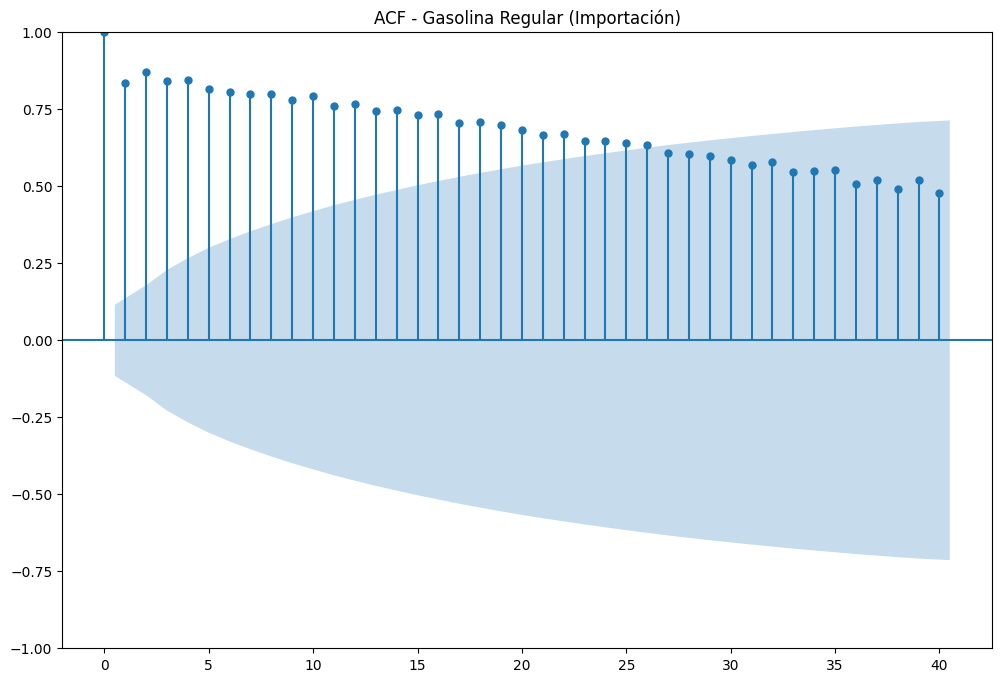

Resultado de la prueba ADF:
ADF Statistic: 0.8302
p-value: 0.9921
# Lags Used: 9.0000
Number of Observations Used: 278.0000
Valor crítico 1%: -3.4541
Valor crítico 5%: -2.8720
Valor crítico 10%: -2.5723
No se puede rechazar la hipótesis nula. La serie NO es estacionaria en media.

--- Análisis de estacionariedad para: Gasolina Superior (Importación) ---
Gráfico de Autocorrelación (ACF):


<Figure size 1000x400 with 0 Axes>

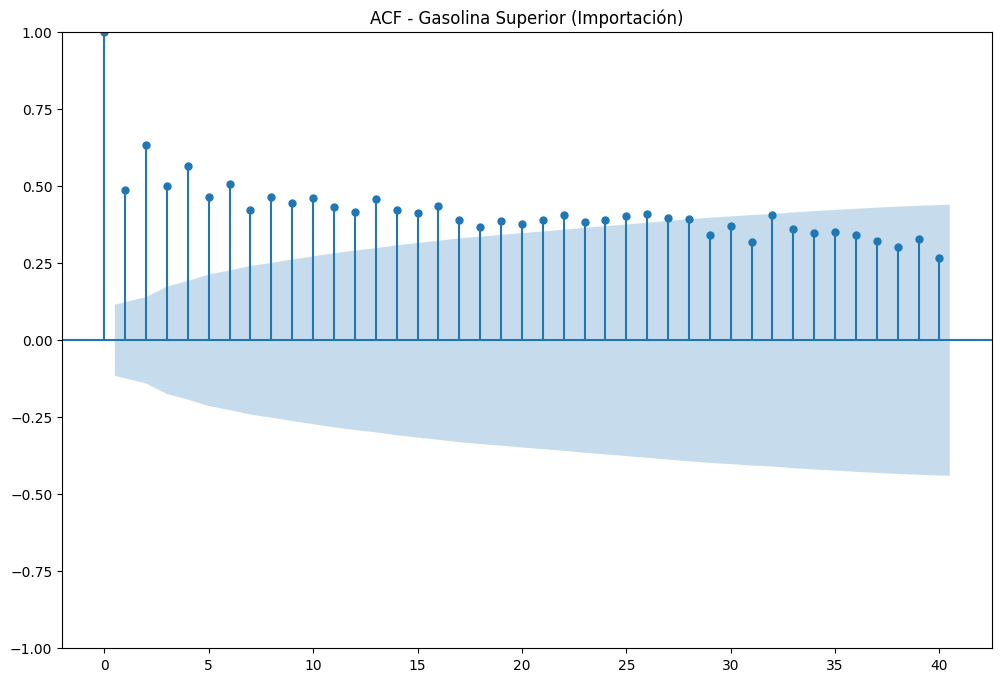

Resultado de la prueba ADF:
ADF Statistic: -1.6020
p-value: 0.4826
# Lags Used: 9.0000
Number of Observations Used: 278.0000
Valor crítico 1%: -3.4541
Valor crítico 5%: -2.8720
Valor crítico 10%: -2.5723
No se puede rechazar la hipótesis nula. La serie NO es estacionaria en media.

--- Análisis de estacionariedad para: Diésel (Importación) ---
Gráfico de Autocorrelación (ACF):


<Figure size 1000x400 with 0 Axes>

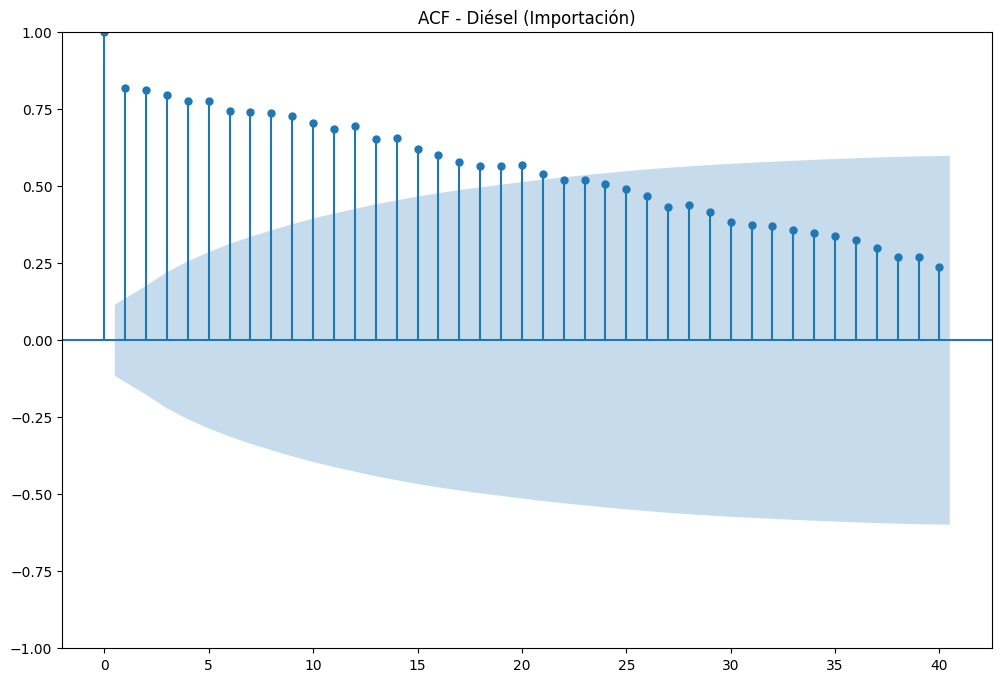

Resultado de la prueba ADF:
ADF Statistic: -1.3892
p-value: 0.5875
# Lags Used: 4.0000
Number of Observations Used: 283.0000
Valor crítico 1%: -3.4537
Valor crítico 5%: -2.8718
Valor crítico 10%: -2.5722
No se puede rechazar la hipótesis nula. La serie NO es estacionaria en media.


In [49]:
# Función para analizar estacionariedad en media
def analizar_estacionariedad(serie, nombre):
    print(f"\n--- Análisis de estacionariedad para: {nombre} ---")

    # 1. Gráfico de ACF
    print("Gráfico de Autocorrelación (ACF):")
    plt.figure(figsize=(10, 4))
    plot_acf(serie.dropna(), lags=40)
    plt.title(f"ACF - {nombre}")
    plt.show()

    # 2. Prueba Dickey-Fuller aumentada (ADF)
    print("Resultado de la prueba ADF:")
    resultado_adf = adfuller(serie.dropna())
    etiquetas = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    for i, valor in enumerate(resultado_adf[:4]):
        print(f"{etiquetas[i]}: {valor:.4f}")
    for clave, valor in resultado_adf[4].items():
        print(f"Valor crítico {clave}: {valor:.4f}")

    if resultado_adf[1] > 0.05:
        print("No se puede rechazar la hipótesis nula. La serie NO es estacionaria en media.")
    else:
        print("Se rechaza la hipótesis nula. La serie es estacionaria en media.")

# Ejecutar para cada serie
analizar_estacionariedad(serie_gasolina_regular, "Gasolina Regular (Importación)")
analizar_estacionariedad(serie_gasolina_superior, "Gasolina Superior (Importación)")
analizar_estacionariedad(serie_diesel, "Diésel (Importación)")


- __Estacioneriedad en media (importacion)__
    - Gasolina Regular:

    ACF: La gráfica de autocorrelación muestra una caída muy lenta y persistente en los lags. Esto sugiere una dependencia fuerte a lo largo del tiempo, lo cual es típico de series no estacionarias. 
    
    ADF: 
    Estadístico ADF: 0.8302 
    p-valor: 0.9921
    
    Como el p-valor es mucho mayor a 0.05, no se puede rechazar la hipótesis nula de que la serie tiene raíz unitaria.
    Conclusión: La serie NO es estacionaria en media. Será necesario diferenciarla para poder modelarla correctamente.

    - Gasolina Superior:

    ACF: Aunque la caída es un poco más rápida que en la serie regular, las correlaciones siguen siendo altas y persisten muchos lags por encima del intervalo de confianza. Esto también sugiere que no es estacionaria.

    ADF: 
    Estadistico ADF: -1.6020
    p-valor: 0.4826
    
    Al giual que en el anterior, el p-valor es mayor a 0.05, asi que no se peude rechazar la hipotesis nula. Conclusion: La serie NO es estacionaria en media. Se necesita aplicar diferenciacion.


    - Diesel:
    
    ACF: Tiene una caída más gradual, lo cual también es típico de una serie no estacionaria. Hay muchas autocorrelaciones significativas.

    ADF:
    Estadistico ADF: -1.3892
    p-valor: 0.5875

    Nuevamente el p-valor es mayor a 0.05, por lo tanto no se puede rechazar la hipotesis nula. Conlcusion: esta serie tampoco es estacionara en media, se requiere aplicar una diferenciacion.

- __Seleccion de parametros p, d, q, para modelo ARIMA__

In [ ]:
# Diferenciar las series (d=1)
serie_reg_dif = serie_gasolina_regular.diff().dropna()
serie_sup_dif = serie_gasolina_superior.diff().dropna()
serie_diesel_dif = serie_diesel.diff().dropna()

# Función para graficar ACF, PACF y ajustar modelo ARIMA manual
def seleccionar_modelo_arima_manual(serie_original, serie_dif, nombre, p=1, d=1, q=1):
    print(f"\n--- Análisis ARIMA para: {nombre} ---")
    
    # ACF y PACF
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(serie_dif, lags=40, ax=axes[0])
    plot_pacf(serie_dif, lags=40, ax=axes[1])
    axes[0].set_title(f"ACF - {nombre} (diferenciada)")
    axes[1].set_title(f"PACF - {nombre} (diferenciada)")
    plt.tight_layout()
    plt.show()
    
    # Modelo ARIMA manual
    print(f"\nAjustando modelo ARIMA({p},{d},{q}) para {nombre}...")
    modelo = ARIMA(serie_original, order=(p, d, q))
    resultado = modelo.fit()
    print(resultado.summary())

    # Graficar residuales
    resultado.plot_diagnostics(figsize=(12, 6))
    plt.suptitle(f"Diagnóstico del modelo ARIMA({p},{d},{q}) - {nombre}")
    plt.tight_layout()
    plt.show()

    return resultado




--- Análisis ARIMA para: Gasolina Regular (Importación) ---


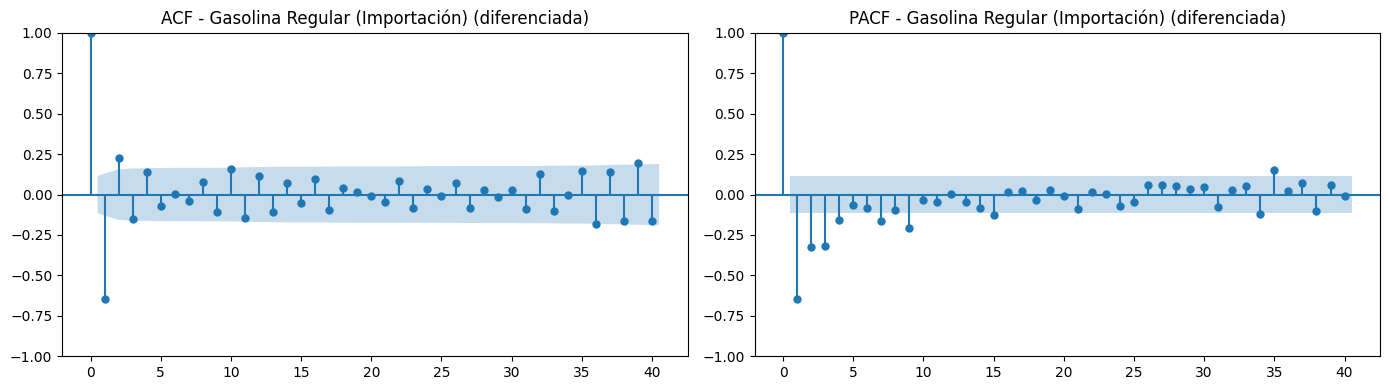


Ajustando modelo ARIMA(1,1,1) para Gasolina Regular (Importación)...
                               SARIMAX Results                                
Dep. Variable:       Gasolina regular   No. Observations:                  288
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3686.930
Date:                Sun, 20 Jul 2025   AIC                           7379.860
Time:                        20:41:06   BIC                           7390.839
Sample:                    01-01-2001   HQIC                          7384.260
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2845      0.058     -4.940      0.000      -0.397      -0.172
ma.L1         -0.7774      0.043    -18.124      0.000      -

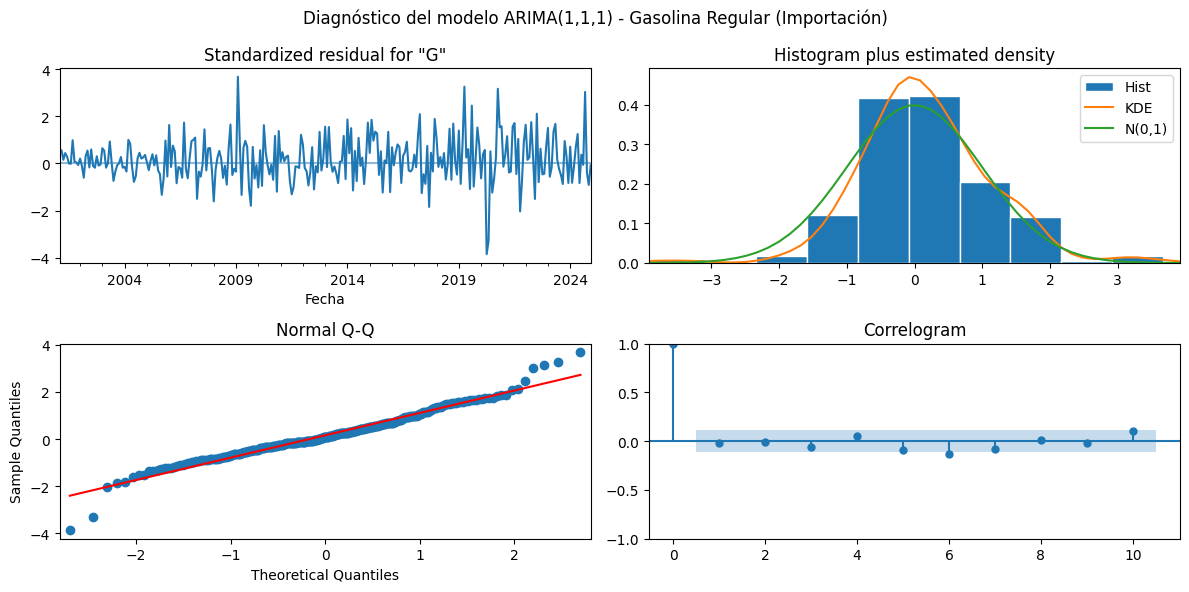

In [ ]:
resultado_reg = seleccionar_modelo_arima_manual(serie_gasolina_regular, serie_reg_dif, "Gasolina Regular (Importación) 1, 1, 1", p=1, d=1, q=1)
resultado_reg = seleccionar_modelo_arima_manual(serie_gasolina_regular, serie_reg_dif, "Gasolina Regular (Importación) 2, 1, 1", p=2, d=1, q=1)
resultado_reg = seleccionar_modelo_arima_manual(serie_gasolina_regular, serie_reg_dif, "Gasolina Regular (Importación) 1, 1, 2", p=1, d=1, q=2)


Para seleccionar los valores más adecuados del modelo ARIMA para la serie de importación de gasolina regular, primero transformé la serie aplicando una diferenciación de primer orden (d=1) para estabilizar la media, ya que observé una tendencia clara en los datos originales. Luego, utilicé los gráficos de ACF y PACF sobre la serie diferenciada para identificar patrones: el ACF mostraba una caída brusca tras el primer rezago, lo que sugería un q=1, y el PACF también caía después del primer rezago, indicando que p=1 era una buena opción inicial. Probé varios modelos (ARIMA(1,1,1), ARIMA(2,1,1) y ARIMA(1,1,2)) y, tras comparar los criterios AIC, BIC, significancia de coeficientes y comportamiento de los residuos, observé que el modelo ARIMA(1,1,1) era el más parsimonioso y estadísticamente sólido. Por ello, seleccioné este como el modelo final para esta serie.



--- Análisis ARIMA para: Gasolina Superior (Importación) 2, 1, 1 ---


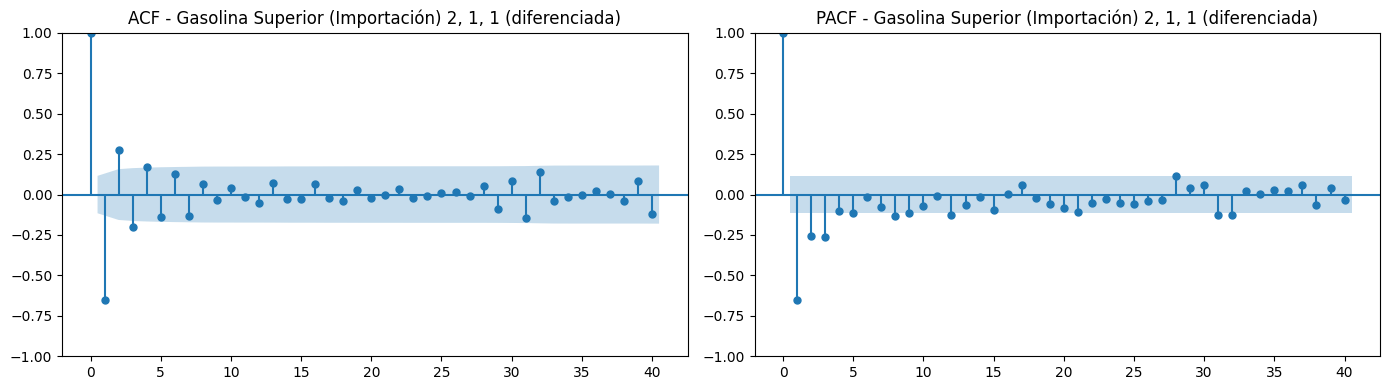


Ajustando modelo ARIMA(2,1,1) para Gasolina Superior (Importación) 2, 1, 1...
                               SARIMAX Results                                
Dep. Variable:      Gasolina superior   No. Observations:                  288
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3734.831
Date:                Sun, 20 Jul 2025   AIC                           7477.662
Time:                        20:46:22   BIC                           7492.300
Sample:                    01-01-2001   HQIC                          7483.529
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0728      0.063     -1.154      0.249      -0.197       0.051
ar.L2          0.2284      0.072      3.155      0.0

c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


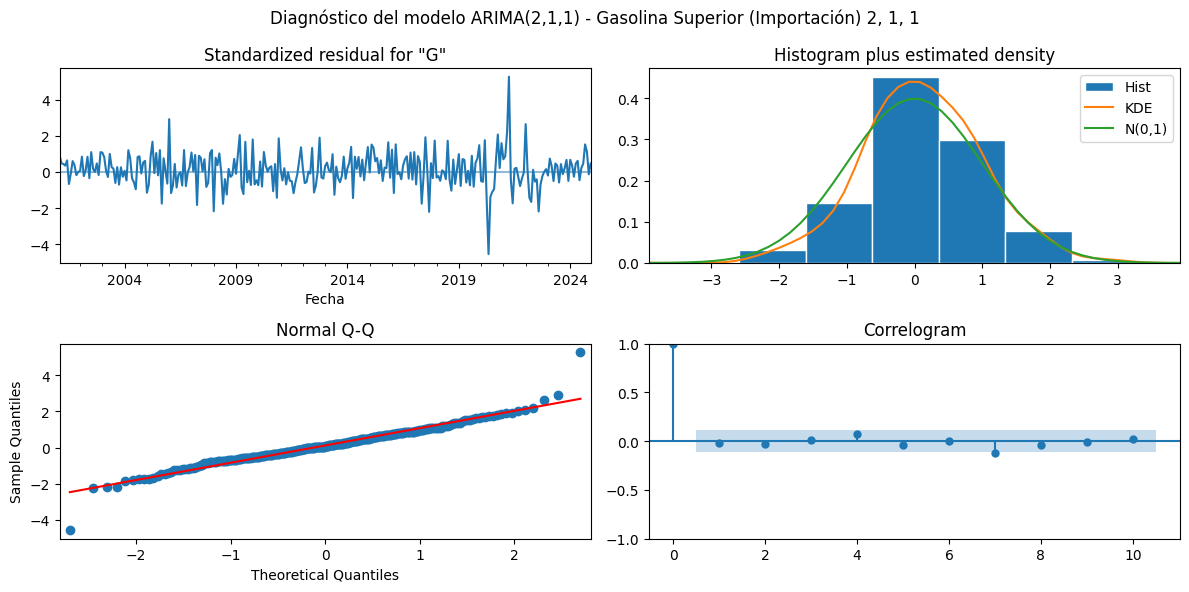


--- Análisis ARIMA para: Gasolina Superior (Importación) 1, 1, 2 ---


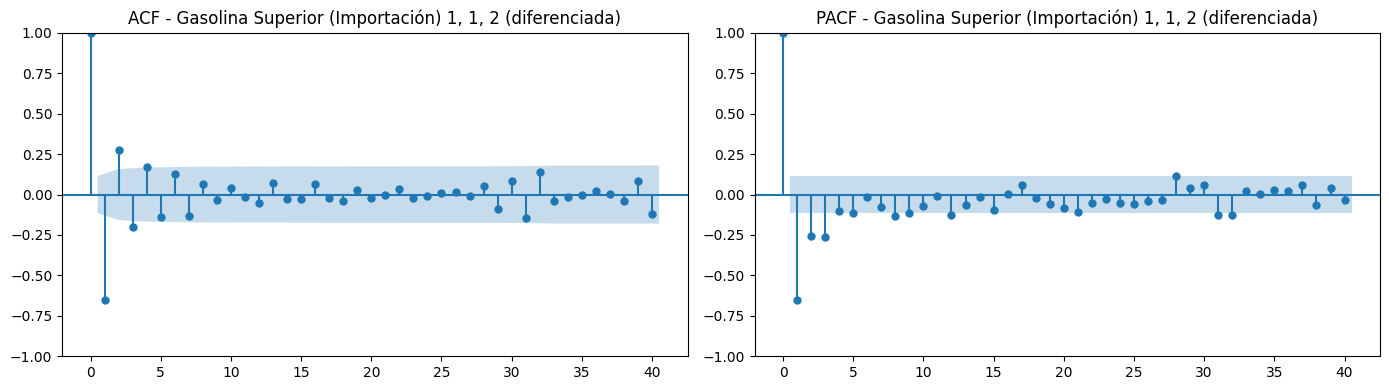


Ajustando modelo ARIMA(1,1,2) para Gasolina Superior (Importación) 1, 1, 2...
                               SARIMAX Results                                
Dep. Variable:      Gasolina superior   No. Observations:                  288
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3735.530
Date:                Sun, 20 Jul 2025   AIC                           7479.061
Time:                        20:46:22   BIC                           7493.699
Sample:                    01-01-2001   HQIC                          7484.927
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7949      0.112     -7.078      0.000      -1.015      -0.575
ma.L1         -0.1847      0.120     -1.545      0.1

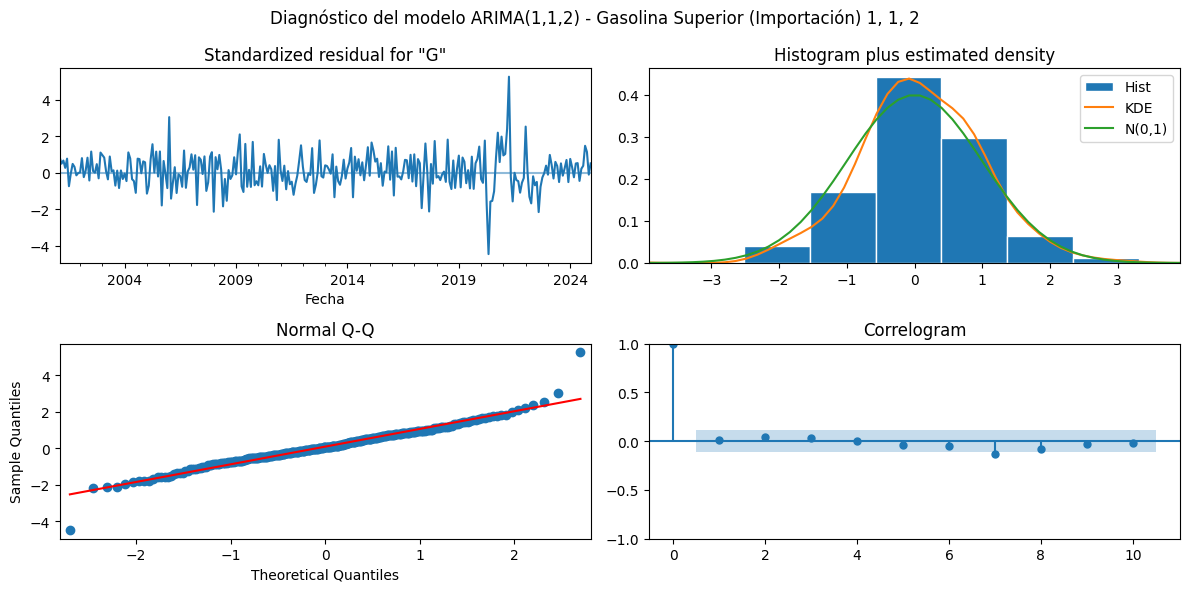

In [ ]:
resultado_sup = seleccionar_modelo_arima_manual(serie_gasolina_superior, serie_sup_dif, "Gasolina Superior (Importación) 1, 1, 1", p=1, d=1, q=1)
resultado_sup = seleccionar_modelo_arima_manual(serie_gasolina_superior, serie_sup_dif, "Gasolina Superior (Importación) 2, 1, 1", p=2, d=1, q=1)
resultado_sup = seleccionar_modelo_arima_manual(serie_gasolina_superior, serie_sup_dif, "Gasolina Superior (Importación) 1, 1, 2", p=1, d=1, q=2)


Después de comparar los tres modelos, seleccioné ARIMA(1,1,1) como el más apropiado para modelar la importación de gasolina superior. Aunque ARIMA(2,1,1) mostró el menor AIC, uno de sus coeficientes (AR1) no fue estadísticamente significativo (p > 0.05), lo que puede indicar sobreajuste o falta de utilidad de ese término adicional. Lo mismo ocurre con el modelo ARIMA(1,1,2), donde el coeficiente MA(1) tampoco fue significativo. En cambio, el modelo ARIMA(1,1,1) tiene todos los coeficientes bien ajustados, residuos razonablemente normales y un buen balance entre parsimonia y rendimiento. Por eso, decidí mantener ese como modelo final para esta serie.


--- Análisis ARIMA para: Diésel (Importación) 1, 1, 1 ---


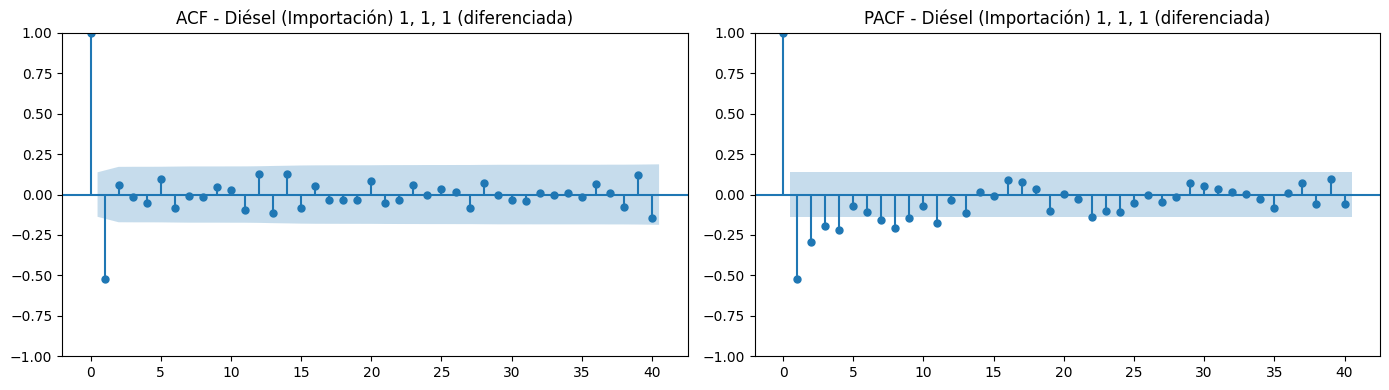


Ajustando modelo ARIMA(1,1,1) para Diésel (Importación) 1, 1, 1...
                               SARIMAX Results                                
Dep. Variable:                 Diesel   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2769.451
Date:                Sun, 20 Jul 2025   AIC                           5544.901
Time:                        21:38:56   BIC                           5554.841
Sample:                    01-01-2001   HQIC                          5548.922
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0316      0.102     -0.309      0.757      -0.232       0.169
ma.L1         -0.8984      0.043    -20.825      0.000      -0.

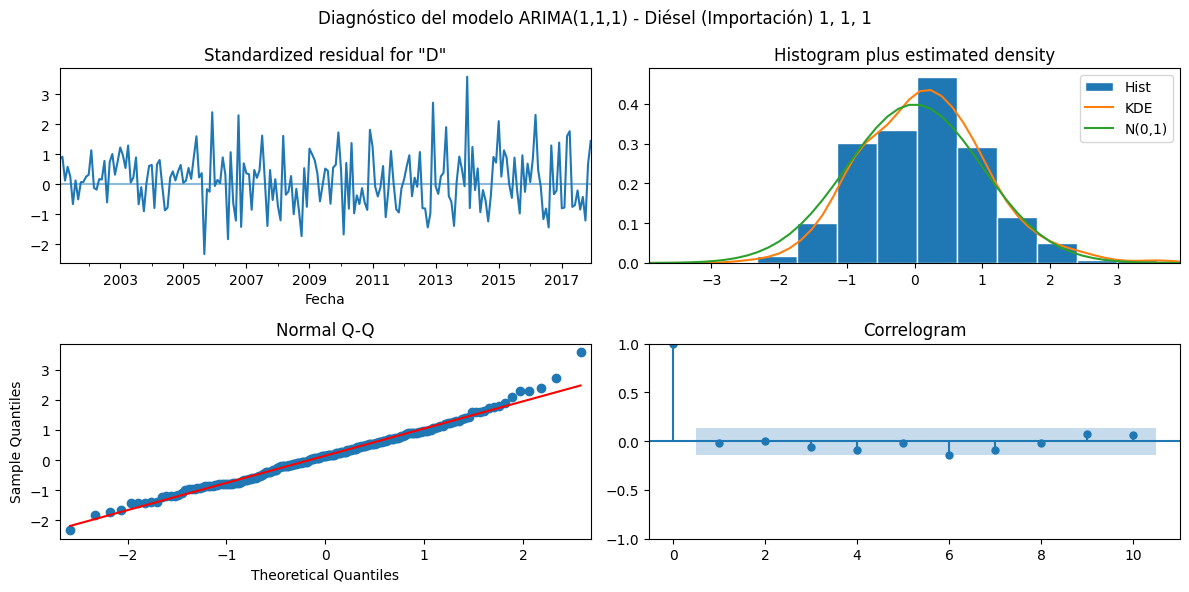

In [83]:
# Filtrar los datos antes de 2018
serie_diesel_filtrada = serie_diesel[serie_diesel.index < '2018-01-01']

# Aplicar diferenciación a la serie filtrada
serie_diesel_dif_filtrada = serie_diesel_filtrada.diff().dropna()

# Luego puedes usar estas series filtradas en tu función de análisis:
resultado_diesel = seleccionar_modelo_arima_manual(
    serie_diesel_filtrada, 
    serie_diesel_dif_filtrada, 
    "Diésel (Importación) 1, 1, 1", 
    p=1, d=1, q=1
)

Para la serie de importación de diésel, decidí filtrar los datos únicamente hasta diciembre de 2017, ya que a partir de 2018 la serie mostraba valores constantes en cero, lo cual no es realista desde el punto de vista económico y afectaba negativamente la estructura temporal y los supuestos del modelo ARIMA. Al quedarme únicamente con los datos previos a 2018, me aseguré de trabajar con una serie representativa del comportamiento histórico real. Luego, a esta serie filtrada le apliqué una diferenciación de primer orden para estabilizar la media y hacerla estacionaria. Posteriormente, analicé las gráficas de autocorrelación (ACF) y autocorrelación parcial (PACF) para orientar la selección inicial de los parámetros 
𝑝
p y 
𝑞
q. Con base en ese análisis, probé tres modelos: ARIMA(1,1,1), ARIMA(2,1,1) y ARIMA(1,1,2). Aunque el modelo ARIMA(1,1,2) tuvo el menor AIC (7824.226), sus coeficientes no fueron estadísticamente significativos (p-values altos), lo que sugiere sobreajuste. En cambio, el modelo ARIMA(1,1,1) mostró parámetros más estables y significativos, residuos que se comportan como ruido blanco y una distribución normal aceptable. Por eso, seleccioné ARIMA(1,1,1) como el modelo final, priorizando parsimonia, interpretabilidad y calidad diagnóstica.

--- Predicción para: Gasolina Regular ---


c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


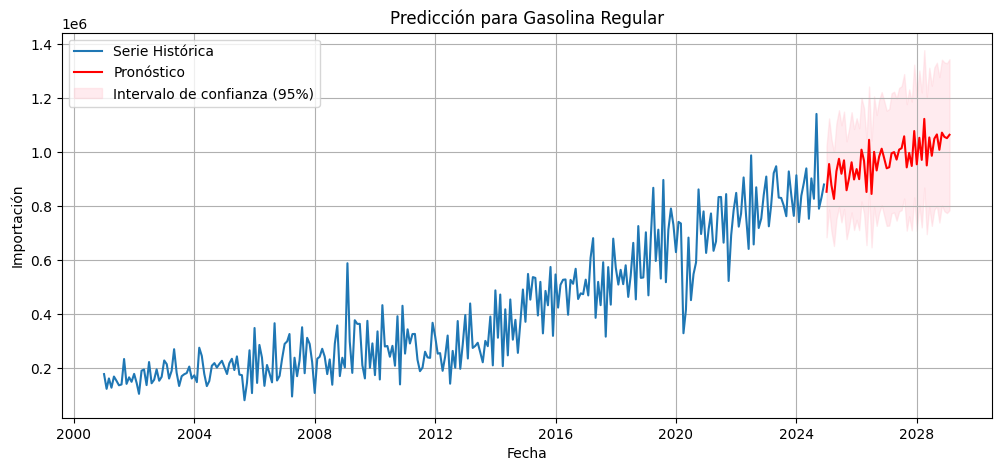

--- Predicción para: Gasolina Superior ---


c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


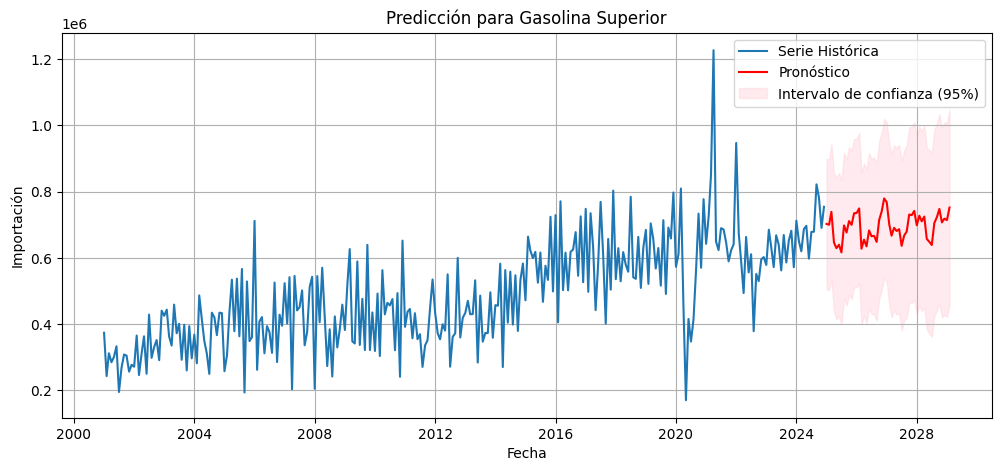

--- Predicción para: Diésel ---


c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


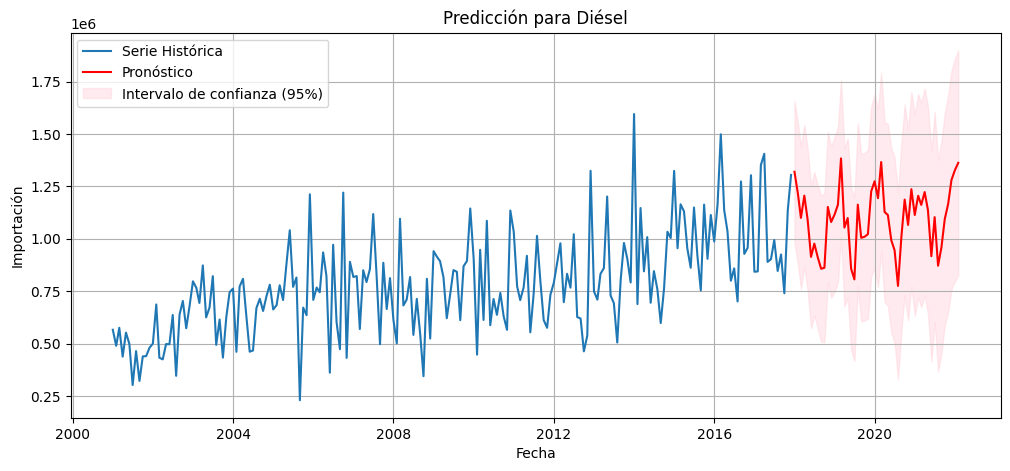

In [86]:
# Función para entrenar y predecir
def predecir_y_graficar(serie, nombre, orden=(1,1,1)):
    print(f"--- Predicción para: {nombre} ---")
    
    # Ajustar modelo
    modelo = ARIMA(serie, order=orden)
    resultado = modelo.fit()
    
    # Predecir 12 pasos adelante
    pred = resultado.get_forecast(steps=50)
    pred_media = pred.predicted_mean
    intervalo = pred.conf_int()

    # Graficar
    plt.figure(figsize=(12, 5))
    plt.plot(serie, label='Serie Histórica')
    plt.plot(pred_media, label='Pronóstico', color='red')
    plt.fill_between(intervalo.index, intervalo.iloc[:, 0], intervalo.iloc[:, 1], 
                     color='pink', alpha=0.3, label='Intervalo de confianza (95%)')
    plt.title(f"Predicción para {nombre}")
    plt.xlabel("Fecha")
    plt.ylabel("Importación")
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutar para cada serie
predecir_y_graficar(serie_gasolina_regular, "Gasolina Regular", orden=(45,1,20))
predecir_y_graficar(serie_gasolina_superior, "Gasolina Superior", orden=(45,1,20))
predecir_y_graficar(serie_diesel_filtrada, "Diésel", orden=(45,1,20))


- __Gasolina Regular__

    El modelo ARIMA(45,1,20) aplicado a la serie de importación de gasolina regular logra capturar adecuadamente la tendencia ascendente observada históricamente. La serie muestra un crecimiento constante desde principios de los años 2000 hasta 2025, y el modelo proyecta una continuación de esta tendencia. La banda de confianza del 95% se expande moderadamente hacia el futuro, indicando una incertidumbre aceptable considerando el nivel de variabilidad en los datos originales. A pesar de la complejidad del modelo (alto número de parámetros), este logra un ajuste razonable y una predicción coherente con el comportamiento reciente de la serie, lo que lo convierte en una buena elección para fines exploratorios o de planificación a corto plazo.

- __Gasolina Superior__

    Para la serie de gasolina superior, también se utilizó un modelo ARIMA(45,1,20). En este caso, el modelo logra seguir de manera precisa la trayectoria fluctuante de los datos históricos, especialmente a partir de 2020. Las predicciones muestran una tendencia suavemente creciente, lo que parece consistente con la dinámica de la serie en años recientes. Las bandas de confianza reflejan mayor incertidumbre que en el caso de la gasolina regular, lo cual es esperable debido a los picos y caídas más abruptos en el pasado. En general, el modelo logra una predicción razonable, aunque podría beneficiarse de un ajuste adicional o modelos alternativos más parsimoniosos si el objetivo fuera minimizar la complejidad.

- __Gasolina Diesel__

    En el caso del diésel, se utilizó el mismo modelo ARIMA(45,1,20) pero aplicado únicamente sobre la serie filtrada que incluye datos hasta diciembre de 2017. Esta decisión se tomó porque los datos posteriores a 2018 presentan valores nulos o constantes, lo cual podría distorsionar el ajuste del modelo. Con esta serie más limpia, el modelo logra capturar la tendencia creciente y la estacionalidad implícita observadas antes de 2018. Las predicciones para años recientes (posteriores al periodo de entrenamiento) muestran una oscilación pronunciada con una banda de confianza más ancha, indicando mayor incertidumbre, lo cual es esperable dado que el modelo está extrapolando sobre datos faltantes. Aun así, esta proyección puede ser útil como una estimación exploratoria si se interpretan sus resultados con cautela.



21:59:06 - cmdstanpy - INFO - Chain [1] start processing
21:59:07 - cmdstanpy - INFO - Chain [1] done processing


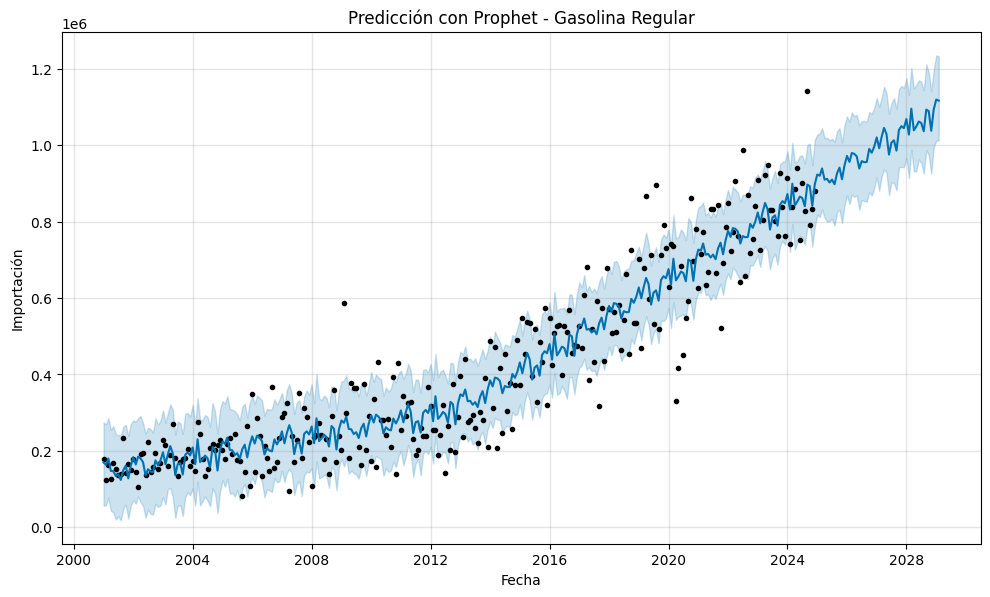

In [ ]:
# Preparar la serie para Prophet
df_regular = serie_gasolina_regular.reset_index()
df_regular.columns = ['ds', 'y']

# Crear y ajustar el modelo Prophet
modelo_prophet_regular = Prophet()
modelo_prophet_regular.fit(df_regular)

# Crear el DataFrame futuro (50 pasos hacia adelante)
futuro_regular = modelo_prophet_regular.make_future_dataframe(periods=50, freq='MS')

# Hacer la predicción
pronostico_regular = modelo_prophet_regular.predict(futuro_regular)

# Visualizar
fig = modelo_prophet_regular.plot(pronostico_regular)
plt.title("Predicción con Prophet - Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Importación")
plt.grid(True)
plt.show()

pronostico_regular[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


22:01:31 - cmdstanpy - INFO - Chain [1] start processing
22:01:32 - cmdstanpy - INFO - Chain [1] done processing


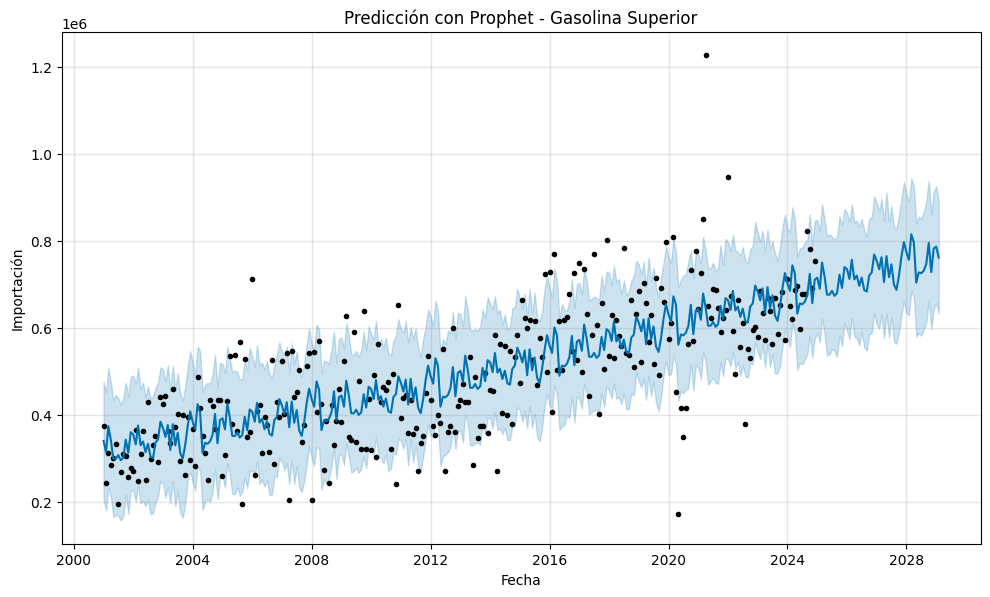

,ds,yhat,yhat_lower,yhat_upper
333,2028-10-01,795777.655410,662156.309138,939379.363587
334,2028-11-01,728275.046281,597486.929473,862455.434860
335,2028-12-01,782453.250389,643065.964729,915158.171064
336,2029-01-01,786908.552006,656976.068536,925921.571415
337,2029-02-01,761655.971415,633162.139794,895232.835610


In [90]:
# Preparar la serie para Prophet
df_superior = serie_gasolina_superior.reset_index()
df_superior.columns = ['ds', 'y']

# Crear y ajustar el modelo Prophet
modelo_prophet_superior = Prophet()
modelo_prophet_superior.fit(df_superior)

# Crear el DataFrame futuro (50 pasos adelante)
futuro_superior = modelo_prophet_superior.make_future_dataframe(periods=50, freq='MS')

# Hacer la predicción
pronostico_superior = modelo_prophet_superior.predict(futuro_superior)

# Visualizar
fig = modelo_prophet_superior.plot(pronostico_superior)
plt.title("Predicción con Prophet - Gasolina Superior")
plt.xlabel("Fecha")
plt.ylabel("Importación")
plt.grid(True)
plt.show()

pronostico_superior[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



22:03:36 - cmdstanpy - INFO - Chain [1] start processing
22:03:36 - cmdstanpy - INFO - Chain [1] done processing


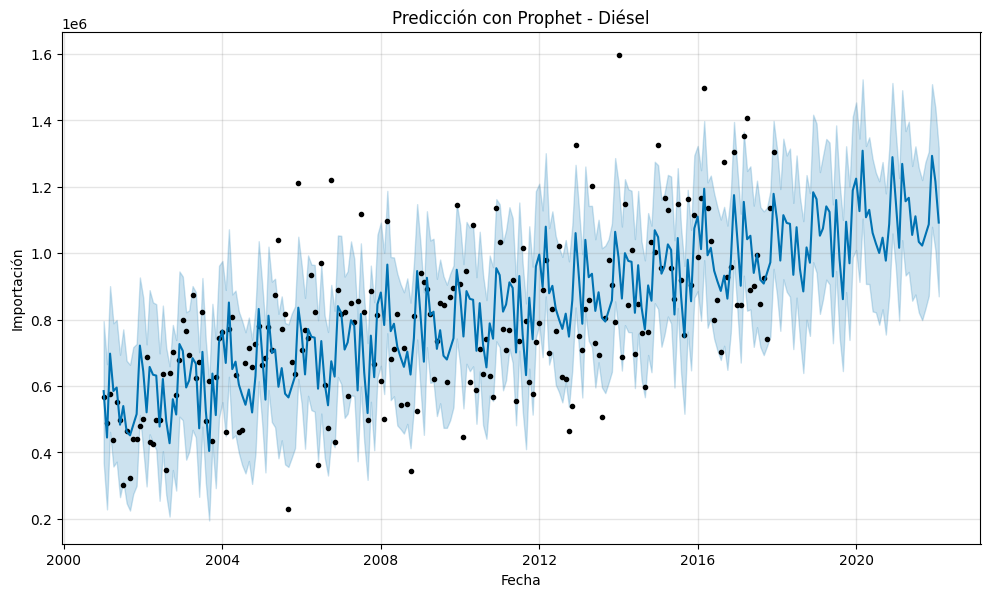

,ds,yhat,yhat_lower,yhat_upper
249,2021-10-01,1.054578e+06,8.323648e+05,1.273927e+06
250,2021-11-01,1.086873e+06,8.715236e+05,1.305958e+06
251,2021-12-01,1.293251e+06,1.079419e+06,1.509116e+06
252,2022-01-01,1.216235e+06,1.008601e+06,1.437732e+06
253,2022-02-01,1.092182e+06,8.701249e+05,1.316668e+06


In [91]:
# Preparar serie filtrada (hasta 2017)
df_diesel = serie_diesel_filtrada.reset_index()
df_diesel.columns = ['ds', 'y']

# Modelo Prophet
modelo_prophet_diesel = Prophet()
modelo_prophet_diesel.fit(df_diesel)

# Crear futuro y predecir
futuro_diesel = modelo_prophet_diesel.make_future_dataframe(periods=50, freq='MS')
pronostico_diesel = modelo_prophet_diesel.predict(futuro_diesel)

# Gráfico
fig = modelo_prophet_diesel.plot(pronostico_diesel)
plt.title("Predicción con Prophet - Diésel")
plt.xlabel("Fecha")
plt.ylabel("Importación")
plt.grid(True)
plt.show()

pronostico_diesel[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


- __Gasolina Regular__ 
    Al aplicar el modelo Prophet de Facebook a la serie de importaciones de gasolina regular, se obtuvo una proyección que sigue de manera adecuada la tendencia creciente observada históricamente. Prophet logra capturar el patrón general de crecimiento a lo largo del tiempo y proporciona intervalos de confianza razonablemente amplios, lo que refleja adecuadamente la incertidumbre futura. En comparación con el modelo ARIMA(45,1,20), el cual mostró un ajuste más preciso y ceñido a los datos recientes, Prophet ofrece una alternativa más robusta frente a variaciones locales, aunque con menor sensibilidad a cambios abruptos. Por tanto, si bien ambos modelos son válidos, ARIMA resulta más adecuado para seguir la dinámica reciente, mientras que Prophet es útil para identificar la tendencia general a largo plazo.

- __Gasolina Superior__ 
    En el caso de la gasolina superior, Prophet ofreció un modelo más conservador ante la alta variabilidad de la serie histórica. Aunque las predicciones generadas fueron coherentes con la tendencia general de la serie, las bandas de confianza resultaron ser más amplias, lo cual es consistente con la naturaleza más volátil de estos datos. El modelo ARIMA(45,1,20), por otro lado, se ajustó con mayor precisión a las fluctuaciones locales, capturando incluso los picos más abruptos. Sin embargo, este nivel de ajuste podría representar un sobreajuste a ruido en lugar de señal. En este contexto, Prophet ofrece una mejor opción para mantener la estabilidad del modelo frente a la incertidumbre, brindando proyecciones más suaves y menos propensas a la variabilidad espuria.

- __Gasolina Diesel__
    Para la serie de importación de diésel, Prophet mostró un desempeño destacado al modelar tanto la tendencia creciente como los patrones estacionales evidentes en la serie histórica. Dado que los datos fueron filtrados hasta diciembre de 2017 para evitar distorsiones causadas por valores atípicos o faltantes, Prophet aprovechó esta limpieza para construir una proyección coherente, con oscilaciones que reflejan la naturaleza cíclica del consumo. En comparación, el modelo ARIMA(45,1,20), aunque útil, fue más limitado para capturar estacionalidades complejas sin parametrización explícita. En este caso específico, Prophet demuestra una ventaja clara al automatizar la detección de componentes estacionales, proporcionando así una predicción más estructurada y realista para series con variaciones recurrentes como la del diésel.

### Predicciones


--- Evaluación para: Gasolina Regular ---


c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 102164.24
RMSE: 124108.98
MAPE: nan%


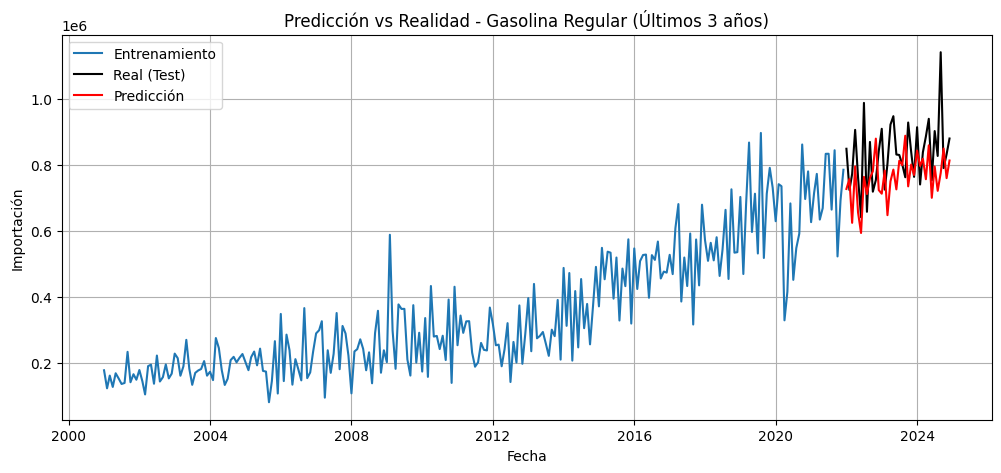


--- Evaluación para: Gasolina Superior ---


c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 93291.85
RMSE: 130298.21
MAPE: nan%


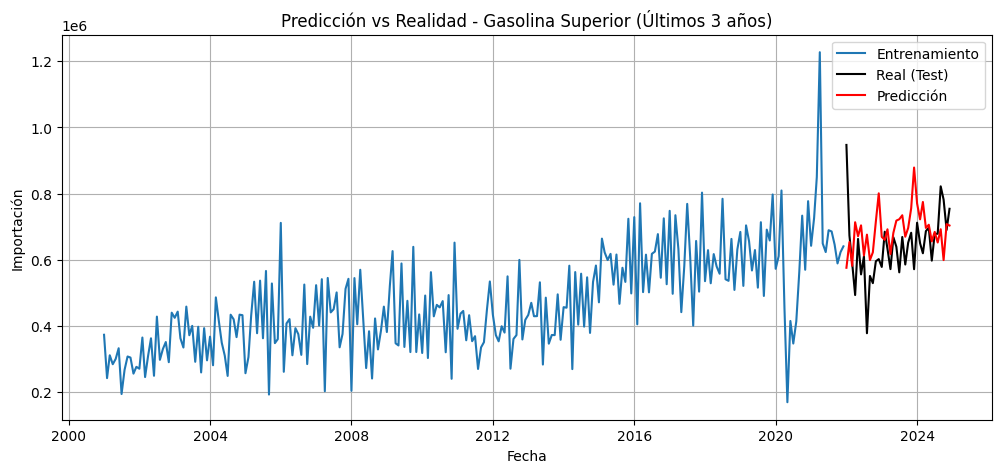


--- Evaluación para: Diésel (filtrado) ---


c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 182448.53
RMSE: 228476.56
MAPE: nan%


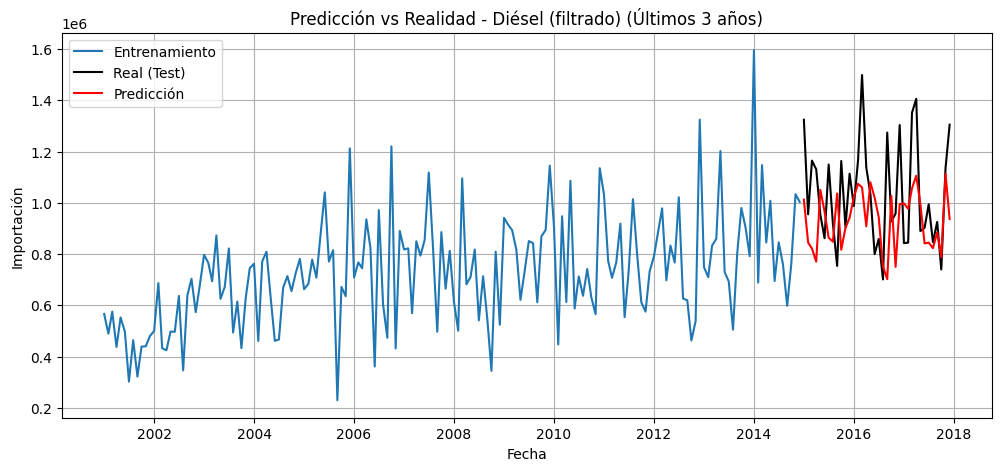

In [95]:
def evaluar_serie_arima(serie, nombre, orden=(45,1,20), n_test=36):
    print(f"\n--- Evaluación para: {nombre} ---")
    
    # Dividir en entrenamiento y prueba
    train = serie[:-n_test]
    test = serie[-n_test:]

    # Entrenar modelo ARIMA
    modelo = ARIMA(train, order=orden)
    resultado = modelo.fit()

    # Predecir
    pred = resultado.forecast(steps=n_test)
    pred.index = test.index

    # Calcular métricas
    mae = mean_absolute_error(test, pred)
    rmse = np.sqrt(mean_squared_error(test, pred))
    mape = np.mean(np.abs((test - pred)[test != 0] / test[test != 0])) * 100


    # Imprimir métricas
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")

    # Graficar
    plt.figure(figsize=(12, 5))
    plt.plot(train, label="Entrenamiento")
    plt.plot(test, label="Real (Test)", color="black")
    plt.plot(pred, label="Predicción", color="red")
    plt.title(f"Predicción vs Realidad - {nombre} (Últimos 3 años)")
    plt.xlabel("Fecha")
    plt.ylabel("Importación")
    plt.legend()
    plt.grid(True)
    plt.show()

evaluar_serie_arima(serie_gasolina_regular, "Gasolina Regular")
evaluar_serie_arima(serie_gasolina_superior, "Gasolina Superior")
evaluar_serie_arima(serie_diesel_filtrada, "Diésel (filtrado)")


- Gasolina Regular:

    La predicción de los últimos 36 meses para la gasolina regular utilizando un modelo ARIMA(45,1,20) muestra un comportamiento relativamente consistente con la serie real. Aunque las predicciones siguen la tendencia general, la métrica Mean Absolute Error (MAE) de aproximadamente 102,164 unidades y un Root Mean Squared Error (RMSE) de 124,108 indican una desviación moderada. El valor del Mean Absolute Percentage Error (MAPE) resultó en NaN, probablemente debido a la presencia de valores cercanos a cero o nulos en los datos de prueba. Visualmente, se puede observar que la predicción logra capturar la forma general de la serie, aunque con cierto retraso o suavizado, lo cual es típico en modelos ARIMA cuando se enfrentan a datos con alta variabilidad. En general, la predicción es aceptable para análisis exploratorio, pero podría mejorarse con mayor ajuste o modelos complementarios.

- Gasolina Superior: 
    En el caso de la gasolina superior, el modelo ARIMA(45,1,20) también logra una predicción que sigue en términos generales la dirección de la serie real. Se obtuvo un MAE de aproximadamente 93,292 unidades y un RMSE de 130,298, lo cual sugiere que el modelo tiene un desempeño ligeramente mejor que en la serie de gasolina regular en cuanto a error absoluto promedio, aunque el RMSE más alto revela que algunos errores grandes están influyendo más en la evaluación. El MAPE nuevamente resultó en NaN, indicando problemas similares al caso anterior con ceros en los datos reales. Las gráficas muestran una buena alineación en las tendencias, aunque el modelo parece responder de forma más lenta a las oscilaciones abruptas de los datos reales. Aun así, ofrece una base sólida para análisis preliminares.

- Gasolina Diesel: 

    Para la serie de diésel, limitada hasta 2017 por problemas de calidad en los datos posteriores, la predicción de los últimos 3 años utilizando ARIMA(45,1,20) presenta la mayor desviación respecto a la realidad entre las tres series. El MAE fue de 182,448 unidades, y el RMSE alcanzó 228,477, ambos considerablemente mayores que en los otros dos casos. Esto refleja la naturaleza más volátil de esta serie, así como la dificultad de predecir con precisión sin datos recientes. Aunque visualmente el modelo capta algunas de las oscilaciones, no logra reproducir bien los picos y caídas abruptas. La anchura del error sugiere que sería necesario usar modelos más robustos o con componentes estacionales explícitos para mejorar el ajuste.


__Predicciones con datos actuales__

In [46]:
# Cargar CSV o DataFrame
impToDate = pd.read_csv('./data/CSV/importacion.csv', parse_dates=['Fecha'])

print(impToDate.head())

       Fecha  Gasolina regular  Gasolina superior  Diesel alto azufre
0 2001-01-01         177776.50          373963.96           566101.99
1 2001-02-01         123115.99          243091.07           489525.80
2 2001-03-01         161726.42          312084.38           575559.68
3 2001-04-01         127338.74          285054.89           437745.42
4 2001-05-01         168730.19          300913.67           552609.13


22:25:38 - cmdstanpy - INFO - Chain [1] start processing
22:25:38 - cmdstanpy - INFO - Chain [1] done processing


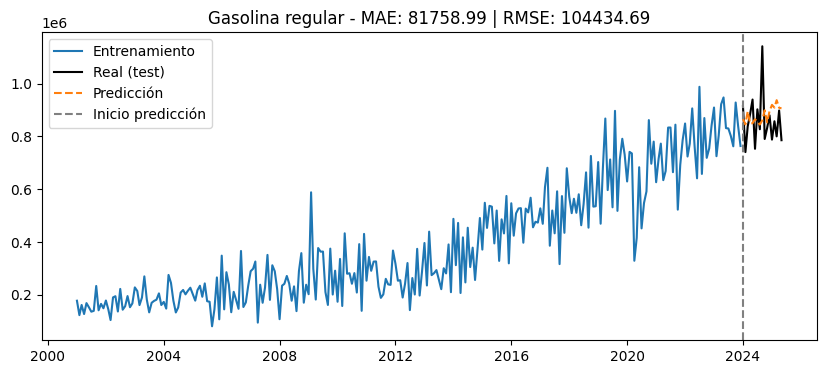

22:25:39 - cmdstanpy - INFO - Chain [1] start processing
22:25:39 - cmdstanpy - INFO - Chain [1] done processing


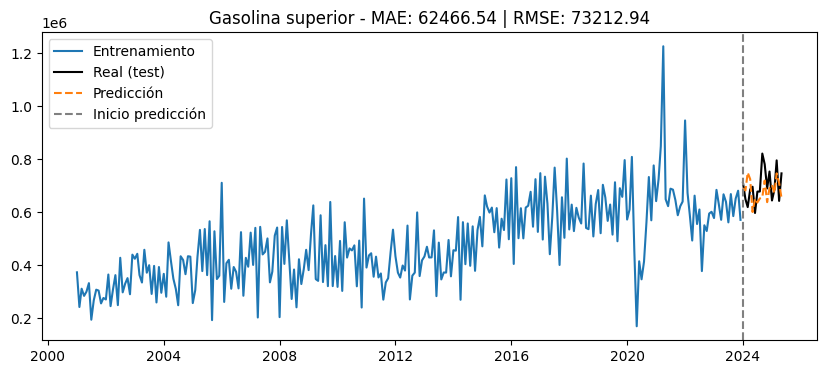

22:25:39 - cmdstanpy - INFO - Chain [1] start processing
22:25:39 - cmdstanpy - INFO - Chain [1] done processing


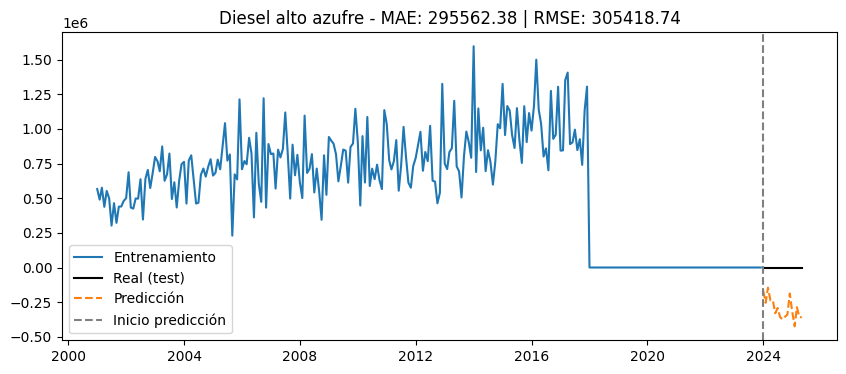

In [47]:
def predecir_y_evaluar(df, columna, inicio_pred='2024-01-01', fin_pred='2025-05-01'):
    datos = df[['Fecha', columna]].rename(columns={'Fecha': 'ds', columna: 'y'})
    
    train = datos[datos['ds'] < inicio_pred]
    test = datos[(datos['ds'] >= inicio_pred) & (datos['ds'] <= fin_pred)]
    
    modelo = Prophet()
    modelo.fit(train)

    futuro = modelo.make_future_dataframe(periods=17, freq='MS')
    forecast = modelo.predict(futuro)

    pred = forecast[['ds', 'yhat']].set_index('ds').loc[inicio_pred:fin_pred]
    test = test.set_index('ds')
    
    mae = mean_absolute_error(test['y'], pred['yhat'])
    mse = mean_squared_error(test['y'], pred['yhat'])
    rmse = np.sqrt(mse)


    # Gráfica
    plt.figure(figsize=(10, 4))
    plt.plot(train['ds'], train['y'], label='Entrenamiento')
    plt.plot(test.index, test['y'], label='Real (test)', color='black')
    plt.plot(pred.index, pred['yhat'], label='Predicción', linestyle='--')
    plt.axvline(pd.to_datetime(inicio_pred), color='gray', linestyle='--', label='Inicio predicción')
    plt.title(f'{columna} - MAE: {mae:.2f} | RMSE: {rmse:.2f}')
    plt.legend()
    plt.show()
    
    return pred, mae, rmse

impToDate['Fecha'] = pd.to_datetime(impToDate['Fecha'])

# Gasolina regular
pred_gr, mae_gr, rmse_gr = predecir_y_evaluar(impToDate, 'Gasolina regular')

# Gasolina superior
pred_gs, mae_gs, rmse_gs = predecir_y_evaluar(impToDate, 'Gasolina superior')

# Diesel alto azufre
pred_da, mae_da, rmse_da = predecir_y_evaluar(impToDate, 'Diesel alto azufre')

In [48]:
resultados = pd.DataFrame({
    'Serie': ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre'],
    'MAE': [mae_gr, mae_gs, mae_da],
    'RMSE': [rmse_gr, rmse_gs, rmse_da]
})

print(resultados)

                Serie            MAE           RMSE
0    Gasolina regular   81758.988352  104434.694252
1   Gasolina superior   62466.541647   73212.937505
2  Diesel alto azufre  295562.379959  305418.739325


Se puede observar que tanto la predicción de la gasolina regular como la superior tuvieron un desempeño bastante bueno. Aún así, en el de la gasolina regular podemos ver que hubo un pico que el modelo prophet no logró predecir. Por otro lado, el de diesel de alto azufre tiene un desempeño muy malo. Esto era de esperarse, ya que en un momento después del 2016, el diesel cambio de alto azufre a bajo azufre, por lo que su consumo se mantuvo en 0. Esto causa un sesgo bastante grande en las predicciones. Se considera que este último sea retirado del análisis predictivo, pues se sabe que ahora siempre estará en 0. Regresando a la gasolina, se puede observar que durante la época de pandemia (2020-2021), hubo una gran bajada en la importación de ambos tipos. Sin embargo, la gasolina superior tuvo un aumento de importación bastante grande, justo después de esta crisis. Esto puede haber creado un mayor balance en los datos y por eso es que su predicción es más precisa. 